In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder
from feature_engine.outlier_removers import Winsorizer

# for Q-Q plots
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
trainset = pd.read_csv('combinednum.csv')

In [3]:
trainset.shape

(3138, 40)

In [4]:
trainset.head()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,3876,408,24.583,363.391914,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.000000,4.172,0.550,0.023,0.107,0.062,0.310,0.166,0.100,0.08353,0.262,0.342,11.022908,5.773744,21.546496,217,3469.825848,2564.36345,0.471,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577
1,10224,1166,28.346,3.000000,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.000000,7.714,0.545,0.040,0.324,0.201,0.253,0.102,0.066,0.07000,0.200,0.148,9.904099,5.773744,18.260000,181,2009.000000,1690.00000,0.472,0.290,0.077,0.099099,0.202202,0.302302,0.396396,14.482893,3.013219,844
2,27023,2927,21.641,9.000000,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.0,0.014809,0.000905,9.789,0.508,0.063,0.129,0.032,0.296,0.215,0.087,0.07000,0.187,0.258,11.011502,5.773744,19.940000,234,4650.000000,1350.00000,0.496,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700
3,8735,1039,23.110,0.000000,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.0,0.022999,0.000000,13.735,0.545,0.038,0.207,0.084,0.255,0.182,0.104,0.08100,0.169,0.274,12.845770,5.773744,30.310000,231,4420.000000,1749.00000,0.503,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592
4,3681,365,21.985,2.000000,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.0,0.016905,0.002202,8.217,0.474,0.034,0.177,0.075,0.324,0.118,0.113,0.08353,0.178,0.340,11.565750,5.773744,21.546496,270,3469.825848,1249.00000,0.516,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444


In [5]:
trainset.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,3.138000e+03,3.138000e+03,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,1.008165e+05,1.396144e+04,28.565132,363.391914,28.514306,0.773394,0.088899,0.088337,0.017103,0.012534,0.000773,0.018076,0.000884,12.203356,0.471619,0.062445,0.217518,0.087144,0.305599,0.212639,0.107099,0.083530,0.164986,0.278452,11.626925,5.773744,21.546496,276.852135,3469.825848,2564.363450,0.499965,0.228692,0.167473,0.145687,0.347500,0.302631,0.204183,11.686458,10.402913,700.496176
std,3.229873e+05,5.403000e+04,8.065512,1210.404460,4.567738,0.198322,0.143953,0.135010,0.069948,0.026358,0.003976,0.017013,0.001628,5.732980,0.072493,0.022685,0.066116,0.040110,0.042367,0.058514,0.022488,0.020306,0.043416,0.052902,1.522444,2.954354,9.785767,58.834698,2570.440739,2075.141335,0.022408,0.033257,0.043046,0.066404,0.070716,0.051685,0.090151,2.660699,2.781861,175.806214
min,1.170000e+02,1.500000e+01,7.279000,-1.000000,9.909000,0.009547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186000,0.012000,0.039000,0.013000,0.131000,0.031000,0.033000,0.030000,0.032000,0.103000,6.965724,-0.340000,3.140000,76.000000,340.000000,190.000000,0.286000,0.082000,0.036000,0.015984,0.074297,0.114458,0.018924,3.654080,0.961076,351.000000
25%,1.106575e+04,1.142750e+03,23.107000,8.000000,25.955250,0.657212,0.005606,0.018718,0.001189,0.002402,0.000000,0.009741,0.000000,8.063250,0.425000,0.046000,0.169000,0.058250,0.284000,0.176000,0.092000,0.070000,0.144000,0.245000,10.449944,5.773744,14.885000,234.000000,1930.000000,1429.000000,0.496000,0.209000,0.140000,0.095522,0.303326,0.266733,0.141752,10.063759,8.561913,586.000000
50%,2.587950e+04,2.812000e+03,27.289500,73.000000,28.745000,0.846237,0.020915,0.037449,0.002596,0.005386,0.000000,0.014736,0.000301,11.335000,0.472000,0.060000,0.215000,0.078000,0.307000,0.212639,0.106000,0.080000,0.164986,0.281000,11.858134,5.773744,21.546496,271.000000,2879.000000,2039.000000,0.504000,0.228000,0.164000,0.130565,0.351500,0.302849,0.181546,11.510979,10.415358,654.000000
75%,6.770775e+04,7.892750e+03,32.455750,363.391914,31.210500,0.933625,0.101715,0.090298,0.006099,0.012019,0.000499,0.021184,0.001118,15.105000,0.516000,0.075000,0.261000,0.107000,0.331750,0.241000,0.122000,0.091000,0.182000,0.313750,12.879822,5.773744,26.057500,314.000000,3909.000000,2759.000000,0.511000,0.246000,0.191000,0.187438,0.396945,0.337672,0.242182,13.038637,12.237736,768.750000
max,1.002029e+07,1.760277e+06,80.718000,29251.000000,49.665000,0.997596,0.858727,0.987039,0.815817,0.418088,0.111187,0.235186,0.019582,44.132000,1.000000,0.242000,0.520000,0.327000,0.483000,0.513000,0.195000,0.182000,0.567000,0.452000,15.037129,51.490000,110.450000,545.000000,28129.000000,23399.000000,0.564000,0.415000,0.488000,0.535750,0.550201,0.477341,0.788153,29.034900,27.397260

In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 40 columns):
population                                    3138 non-null int64
renter_occupied_households                    3138 non-null int64
pct_renter_occupied                           3138 non-null float64
evictions                                     3138 non-null float64
rent_burden                                   3138 non-null float64
pct_white                                     3138 non-null float64
pct_af_am                                     3138 non-null float64
pct_hispanic                                  3138 non-null float64
pct_am_ind                                    3138 non-null float64
pct_asian                                     3138 non-null float64
pct_nh_pi                                     3138 non-null float64
pct_multiple                                  3138 non-null float64
pct_other                                     3138 non-null float64
poverty_rate 

### Plot boxplot to see any outliers for each variable

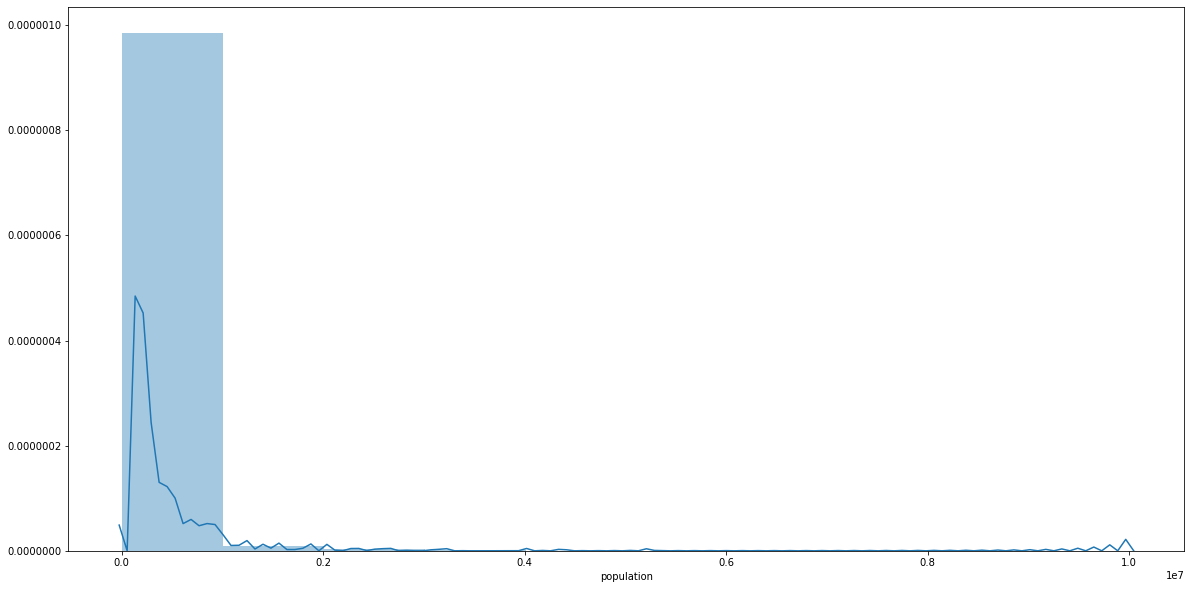

In [7]:
plt.figure(figsize=(20,10))
sns.distplot(trainset.population,bins=10)
plt.show()

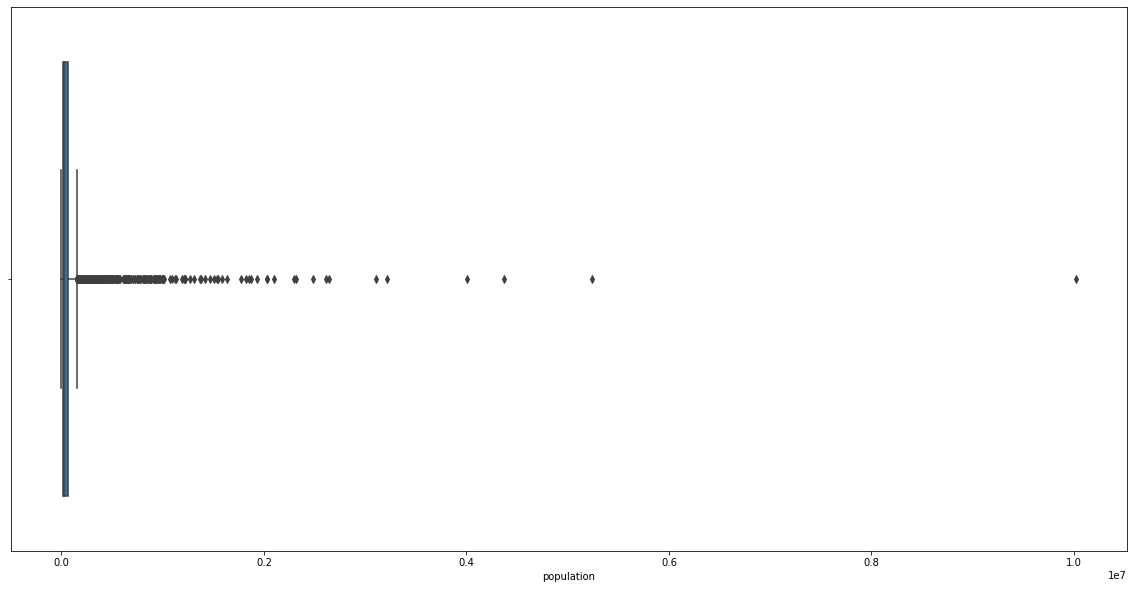

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.population)
plt.show()

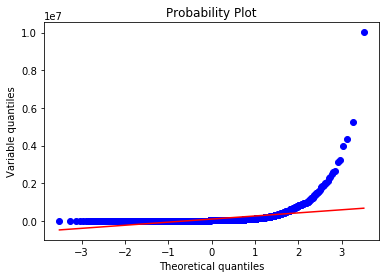

In [9]:
stats.probplot(trainset['population'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

### Since this is not normal distribution, use outlier capping with IQR

In [10]:
low = trainset['population'].quantile(0.25)
high = trainset['population'].quantile(0.75)
print(low,high)

11065.75 67707.75


In [11]:
interquantile_range = high - low
print(interquantile_range)

56642.0


In [12]:
lower_boundary = low - (interquantile_range*1.5)
upper_boundary = high + (interquantile_range*1.5)
print(lower_boundary)
print(upper_boundary)

-73897.25
152670.75


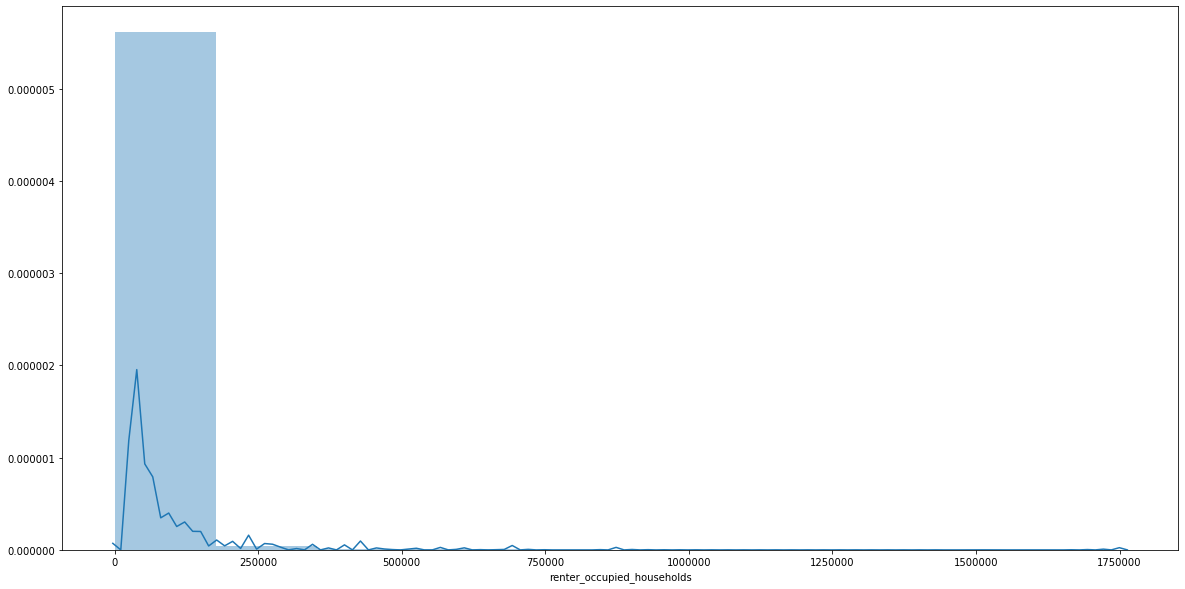

In [13]:
plt.figure(figsize=(20,10))
sns.distplot(trainset.renter_occupied_households,bins=10)
plt.show()

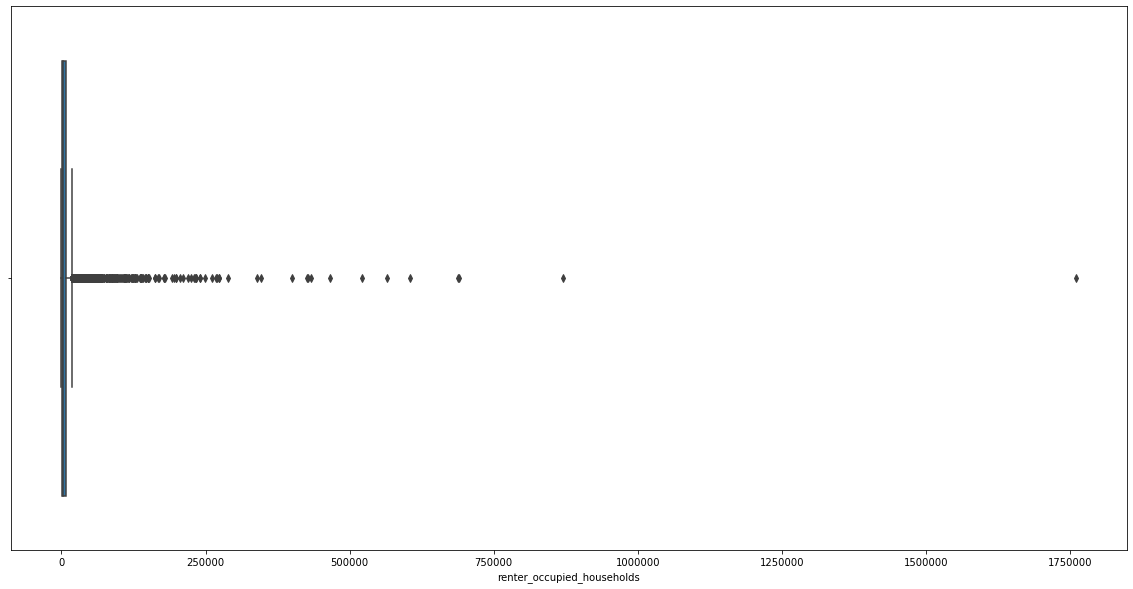

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.renter_occupied_households)
plt.show()

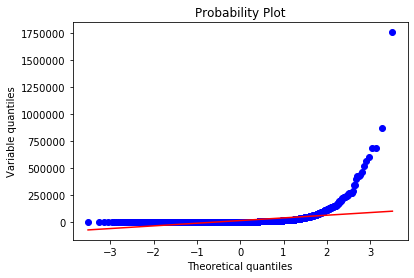

In [15]:
stats.probplot(trainset['renter_occupied_households'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [16]:
low = trainset['renter_occupied_households'].quantile(0.25)
high = trainset['renter_occupied_households'].quantile(0.75)
print(low,high)

interquantile_range = high - low
print(interquantile_range)

lower_boundary = low - (interquantile_range*1.5)
upper_boundary = high + (interquantile_range*1.5)
print(lower_boundary)
print(upper_boundary)

1142.75 7892.75
6750.0
-8982.25
18017.75


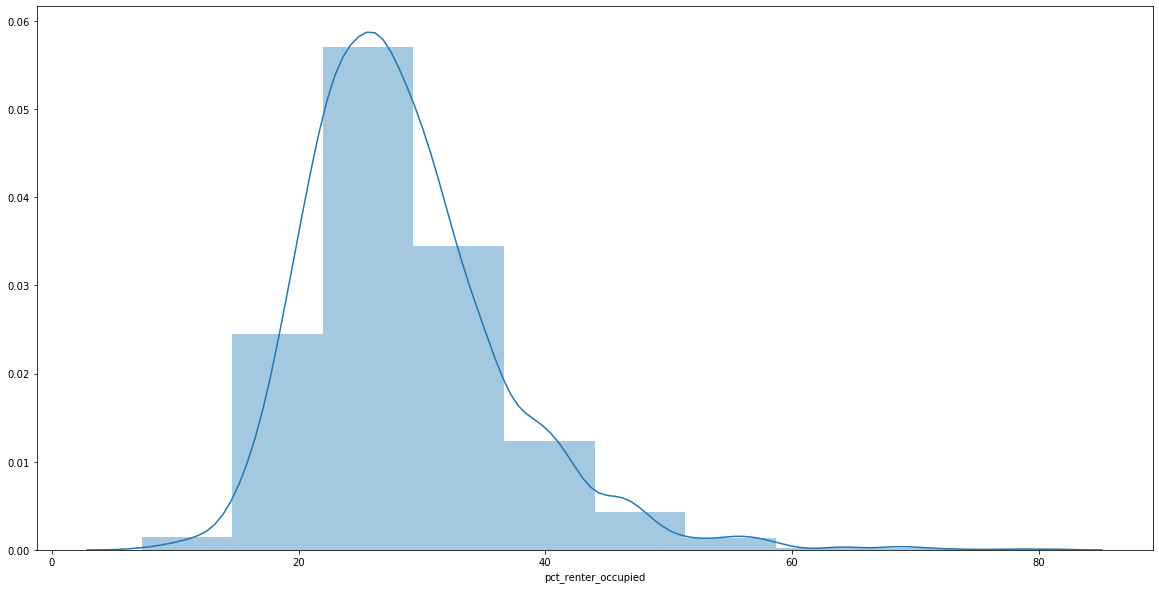

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(trainset.pct_renter_occupied,bins=10)
plt.show()

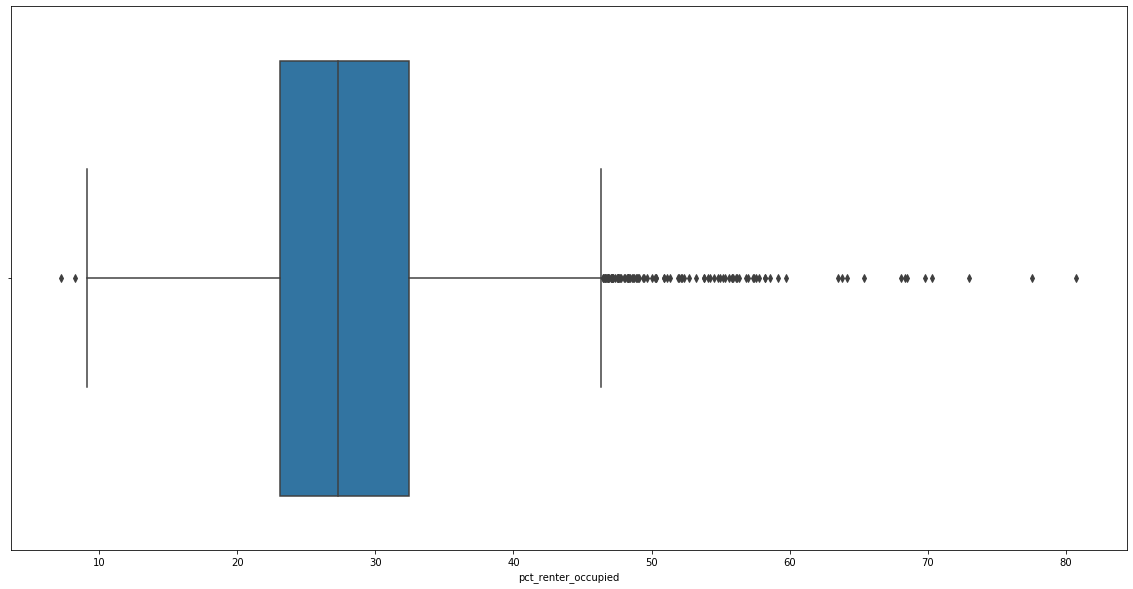

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_renter_occupied)
plt.show()

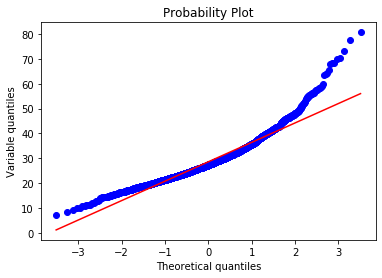

In [19]:
stats.probplot(trainset['pct_renter_occupied'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [20]:
low = trainset['pct_renter_occupied'].quantile(0.25)
high = trainset['pct_renter_occupied'].quantile(0.75)
print(low,high)

interquantile_range = high - low
print(interquantile_range)

lower_boundary = low - (interquantile_range*1.5)
upper_boundary = high + (interquantile_range*1.5)
print(lower_boundary)
print(upper_boundary)

23.107 32.455749999999995
9.348749999999995
9.083875000000006
46.47887499999999


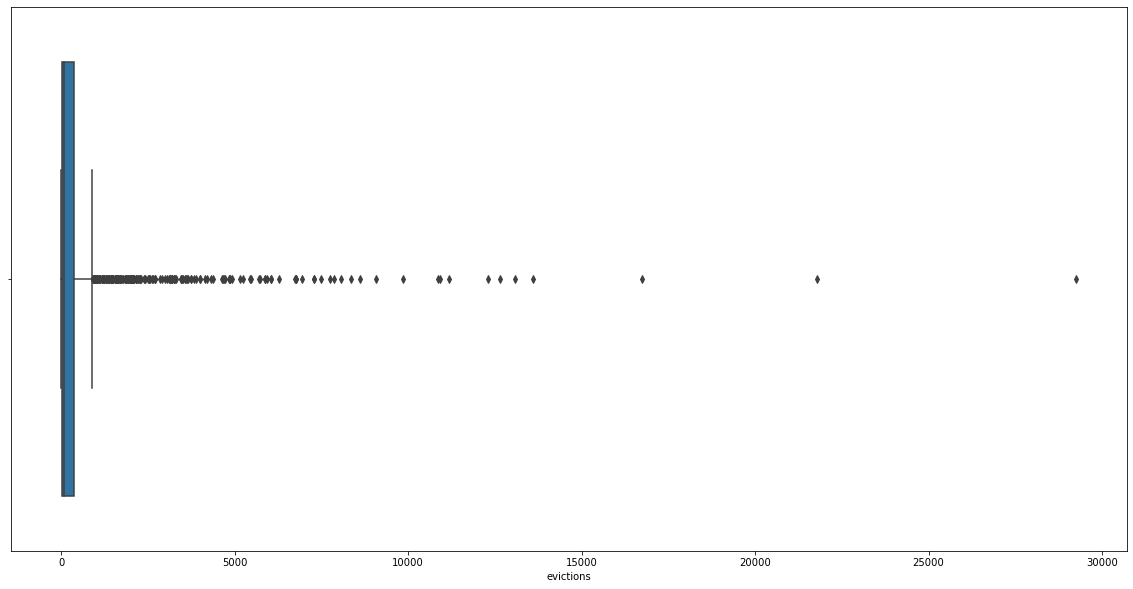

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.evictions)
plt.show()

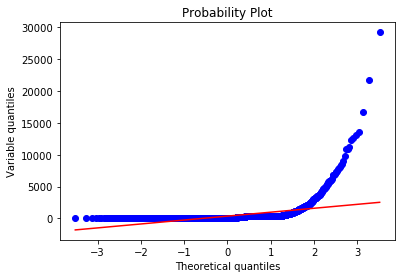

In [22]:
stats.probplot(trainset['evictions'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [23]:
lower_boundary = trainset['evictions'].quantile(0.05)
upper_boundary = trainset['evictions'].quantile(0.95)
print(lower_boundary,upper_boundary)

0.0 1333.1499999999924


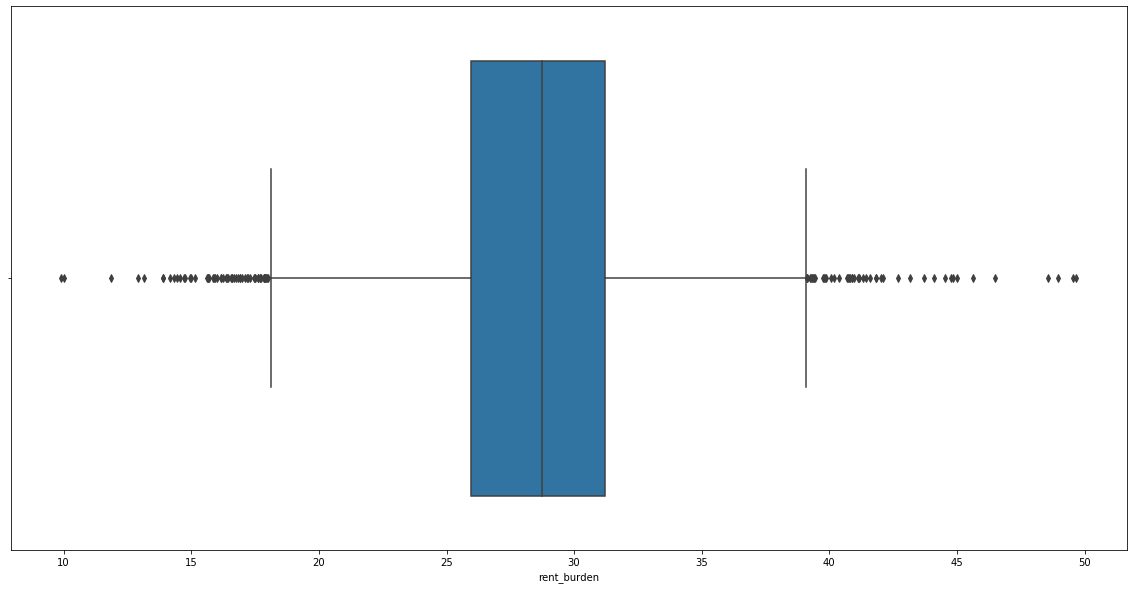

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.rent_burden)
plt.show()

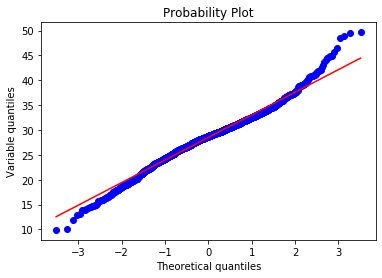

In [25]:
stats.probplot(trainset['rent_burden'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [26]:
lower_boundary = trainset['rent_burden'].quantile(0.05)
upper_boundary = trainset['rent_burden'].quantile(0.95)
print(lower_boundary,upper_boundary)

20.42235 35.54719999999999


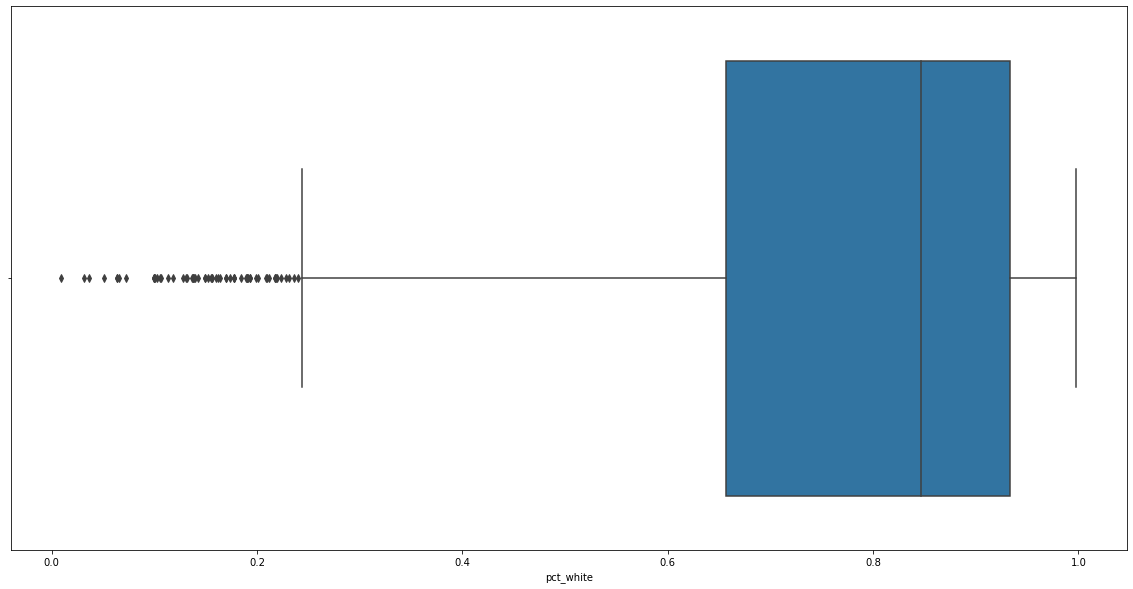

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_white)
plt.show()

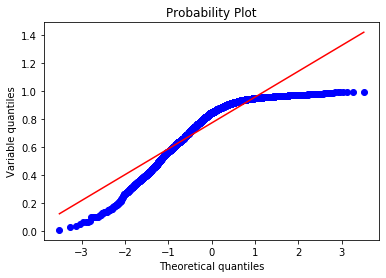

In [28]:
stats.probplot(trainset['pct_white'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

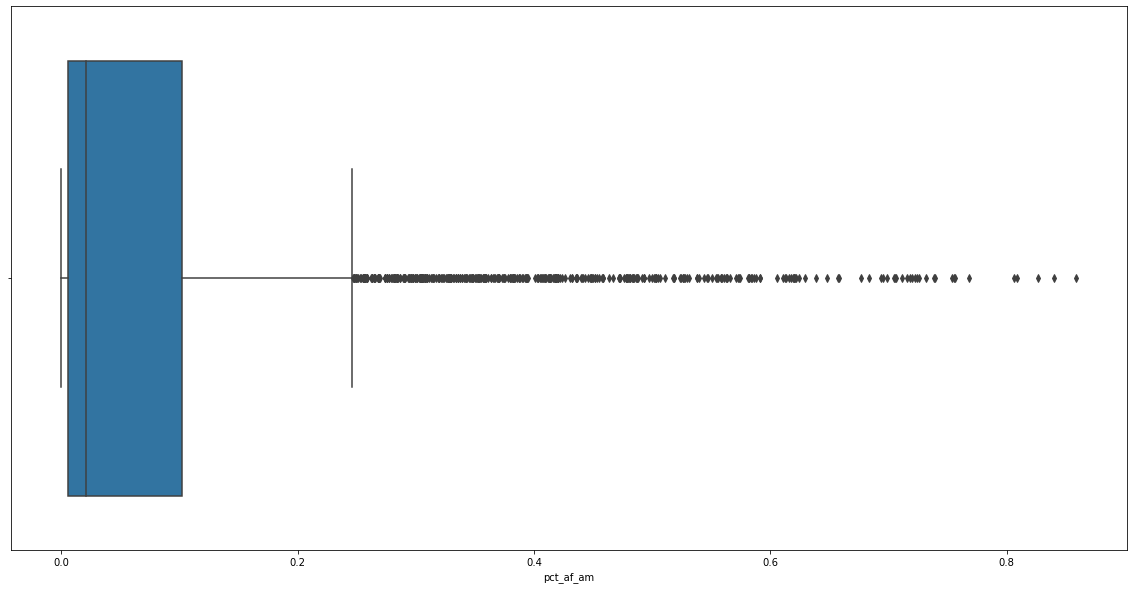

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_af_am)
plt.show()

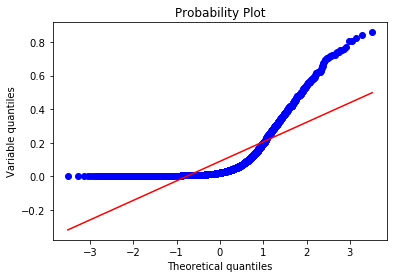

In [30]:
stats.probplot(trainset['pct_af_am'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

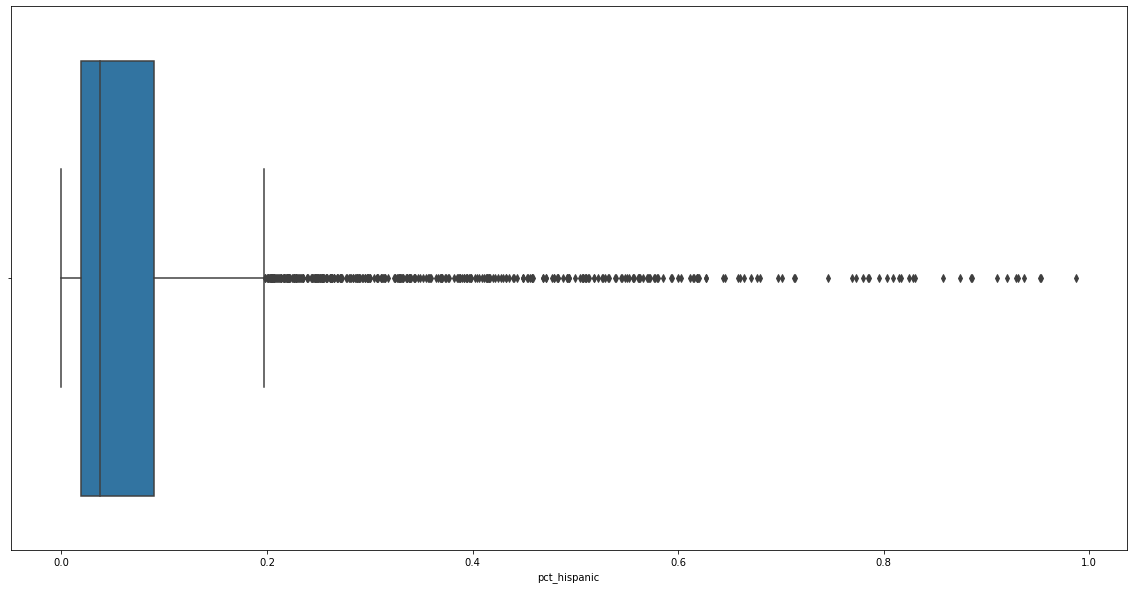

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_hispanic)
plt.show()

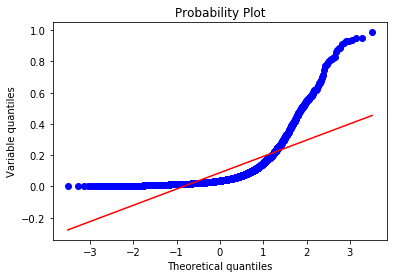

In [32]:
stats.probplot(trainset['pct_hispanic'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

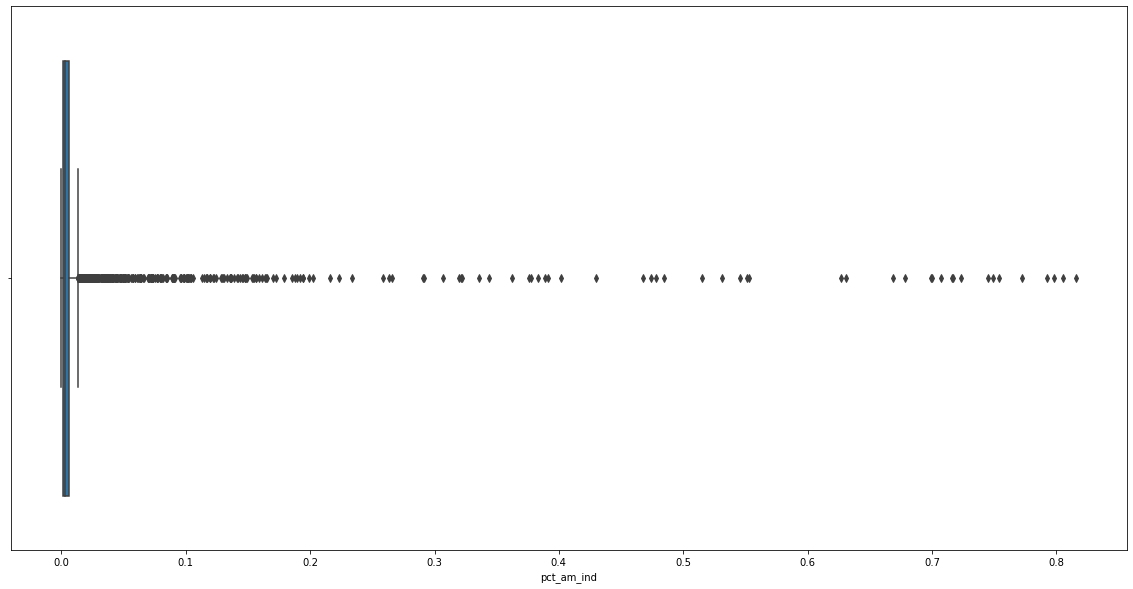

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_am_ind)
plt.show()

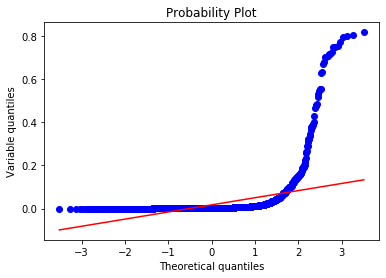

In [34]:
stats.probplot(trainset['pct_am_ind'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

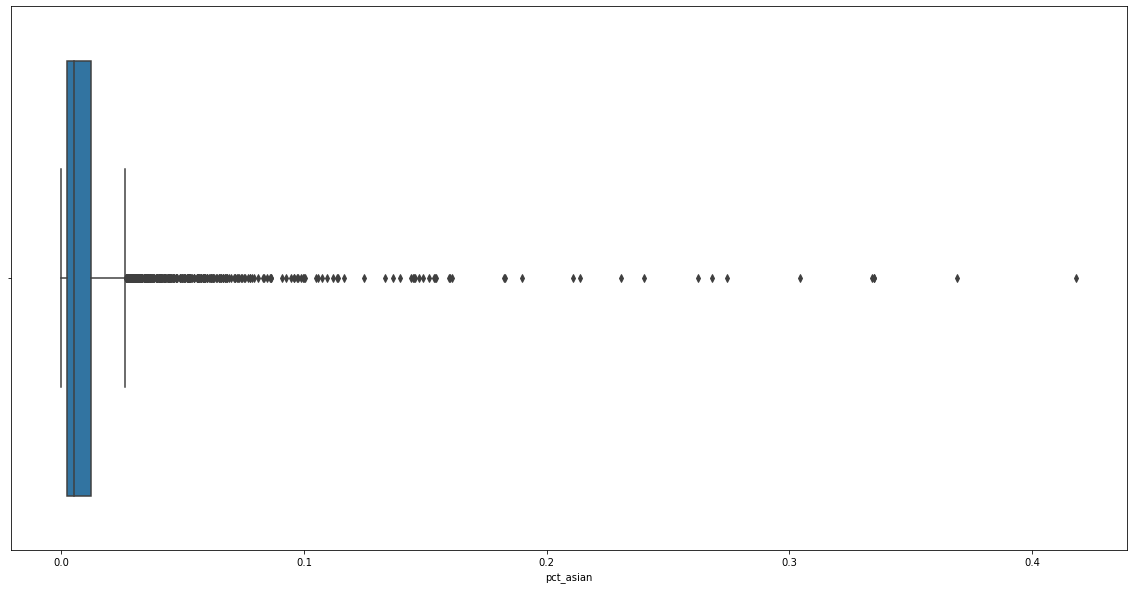

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_asian)
plt.show()

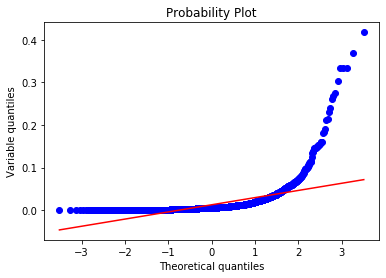

In [36]:
stats.probplot(trainset['pct_asian'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

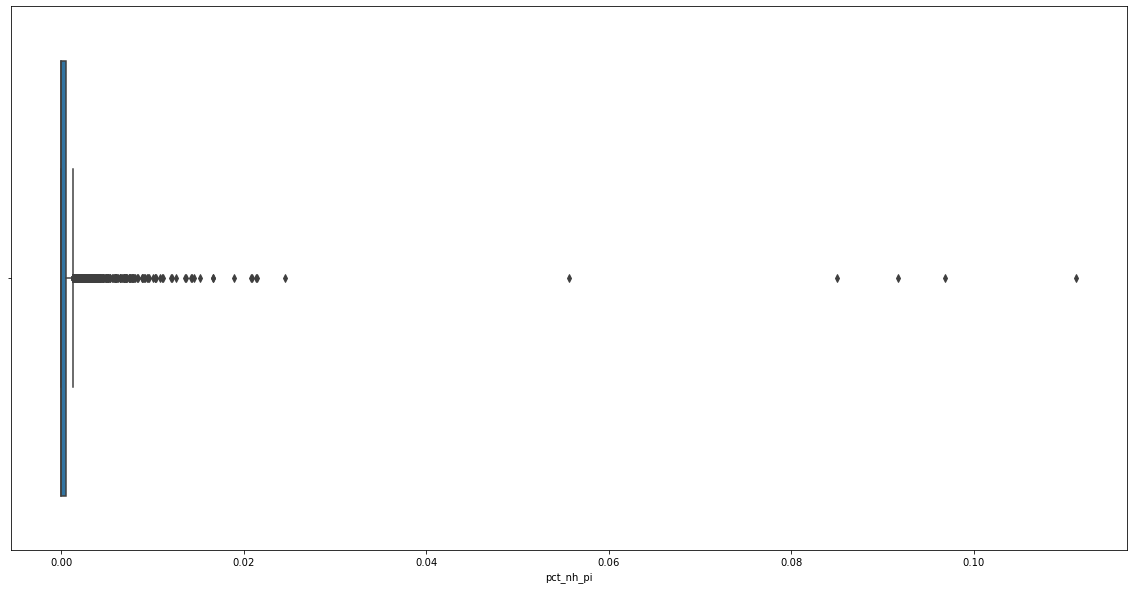

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_nh_pi)
plt.show()

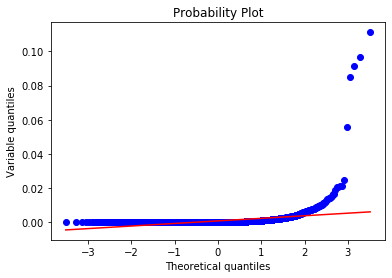

In [38]:
stats.probplot(trainset['pct_nh_pi'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

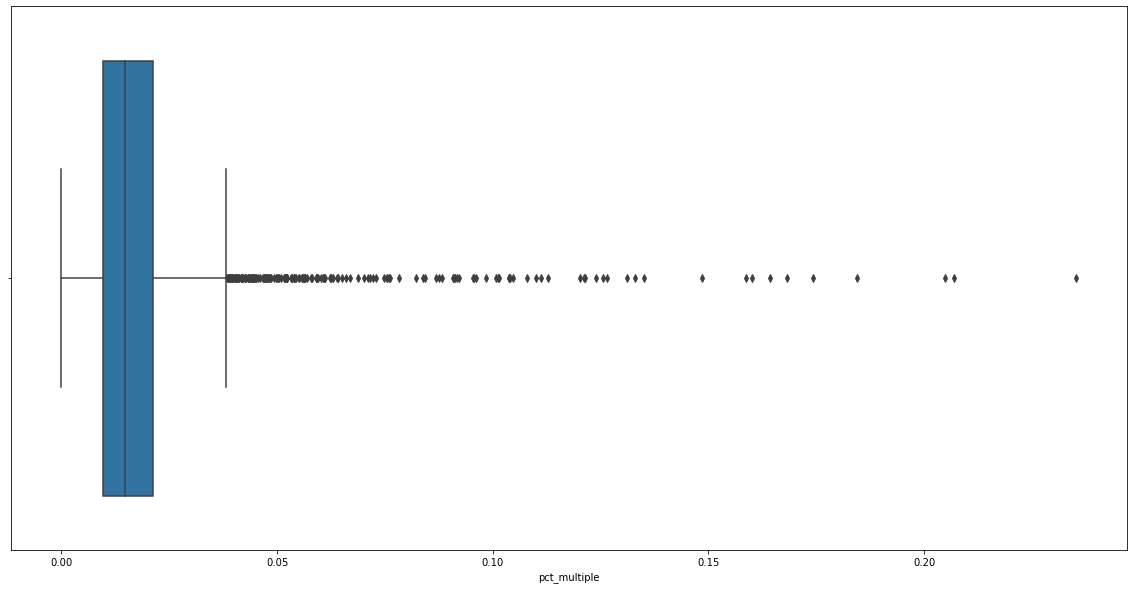

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_multiple)
plt.show()

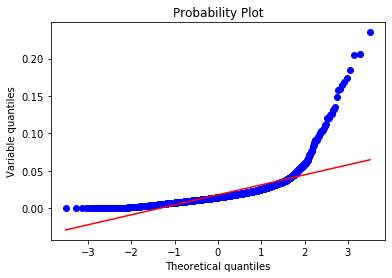

In [40]:
stats.probplot(trainset['pct_multiple'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

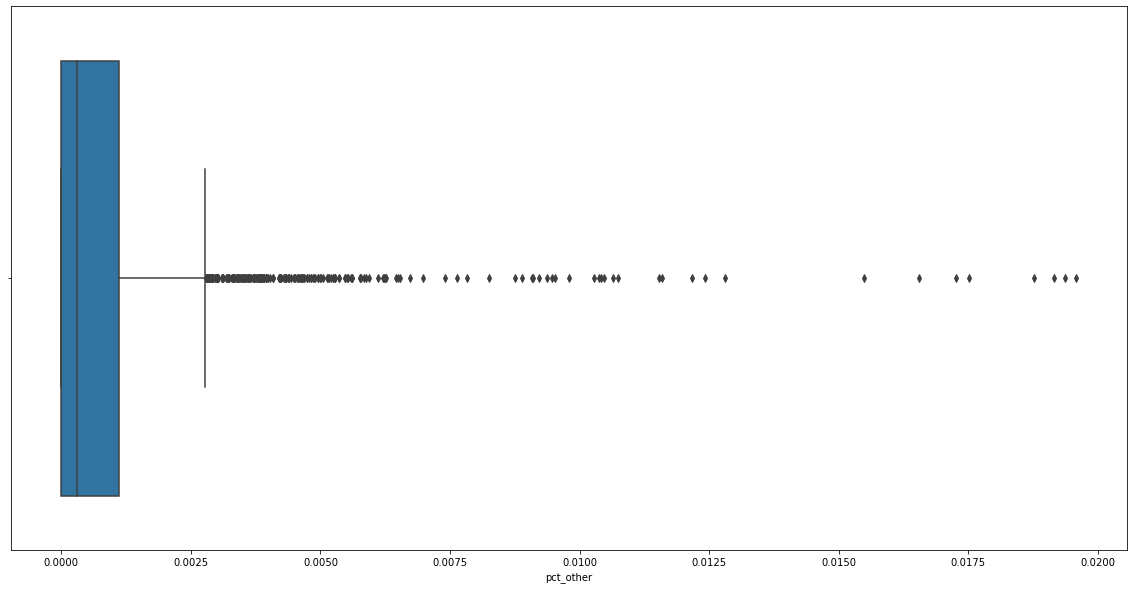

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_other)
plt.show()

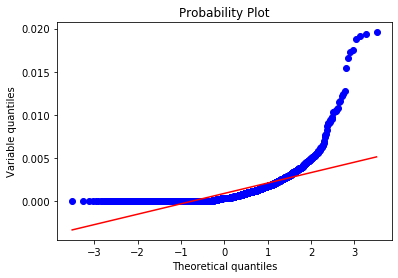

In [42]:
stats.probplot(trainset['pct_other'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

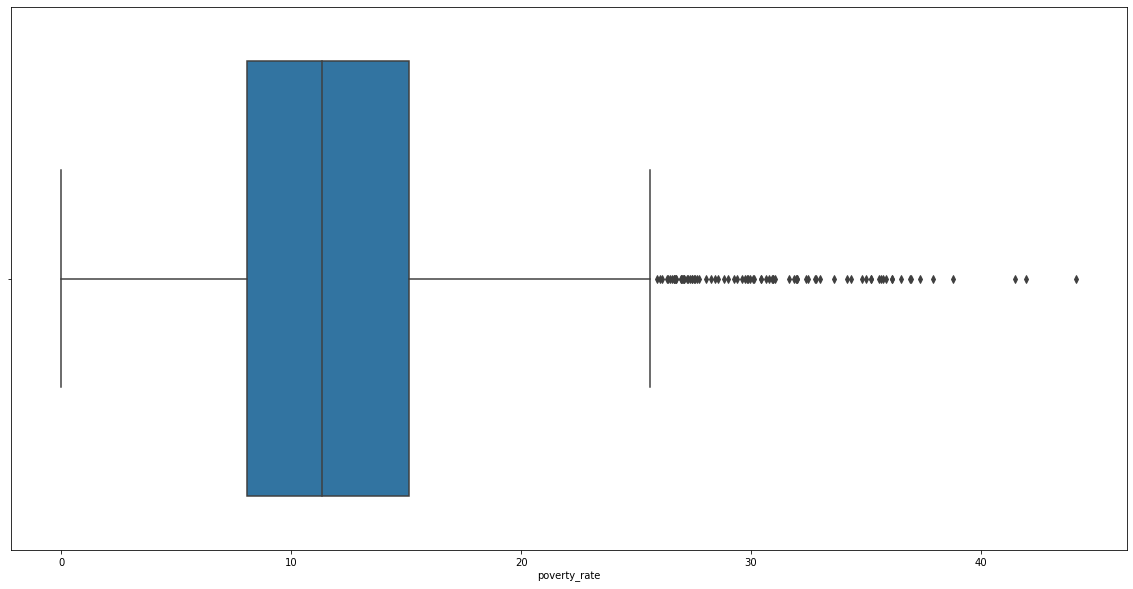

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.poverty_rate)
plt.show()

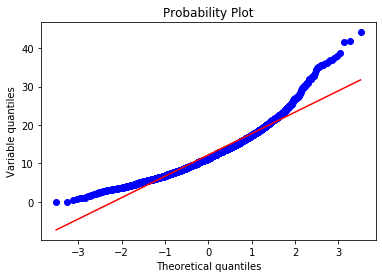

In [44]:
stats.probplot(trainset['poverty_rate'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [45]:
lower_boundary = trainset['poverty_rate'].quantile(0.05)
upper_boundary = trainset['poverty_rate'].quantile(0.95)
print(lower_boundary,upper_boundary)

4.753450000000001 22.51215


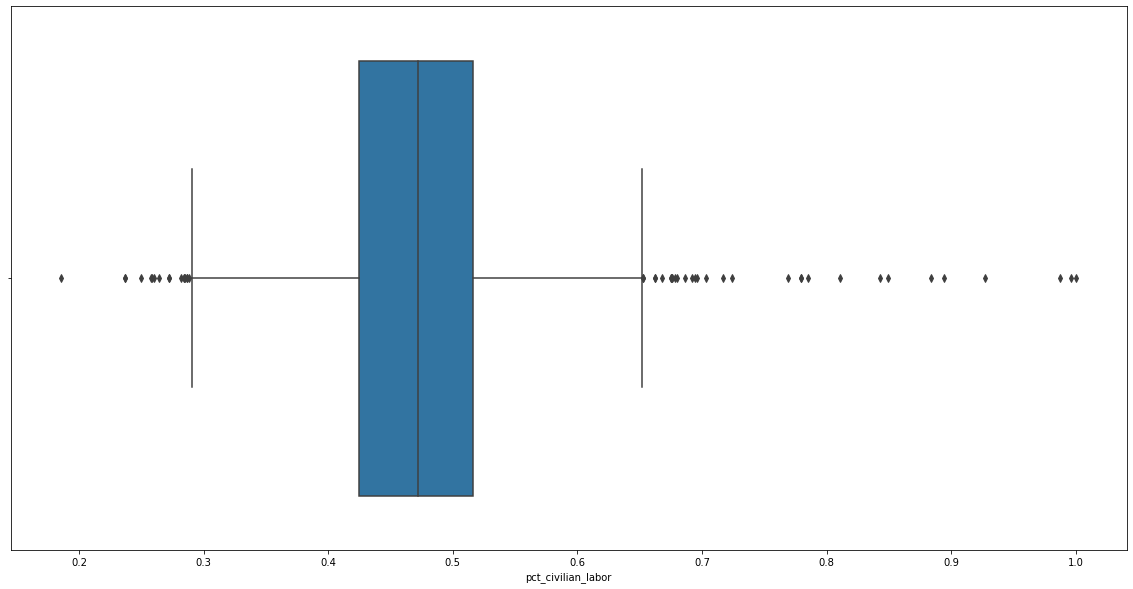

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_civilian_labor)
plt.show()

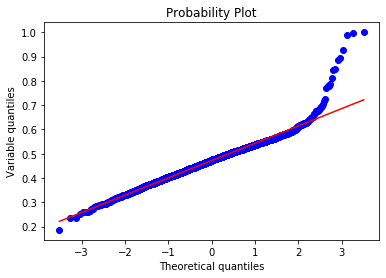

In [47]:
stats.probplot(trainset['pct_civilian_labor'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

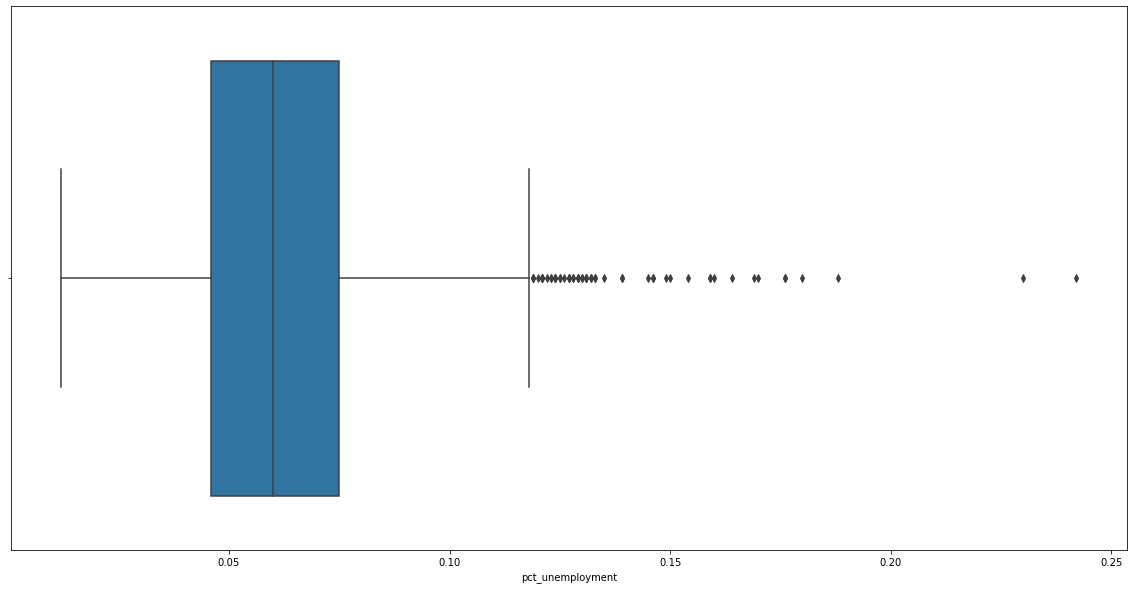

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_unemployment)
plt.show()

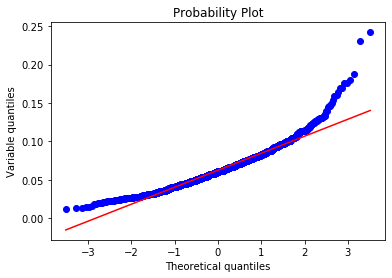

In [49]:
stats.probplot(trainset['pct_unemployment'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

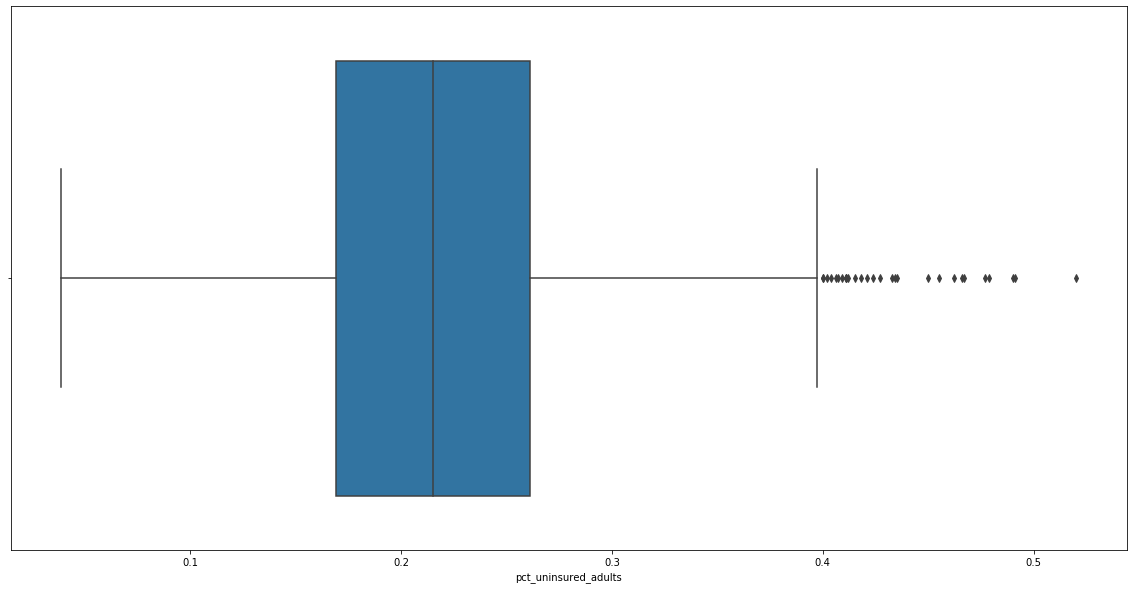

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_uninsured_adults)
plt.show()

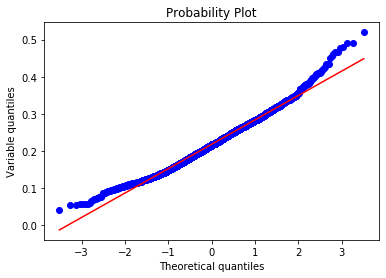

In [51]:
stats.probplot(trainset['pct_uninsured_adults'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

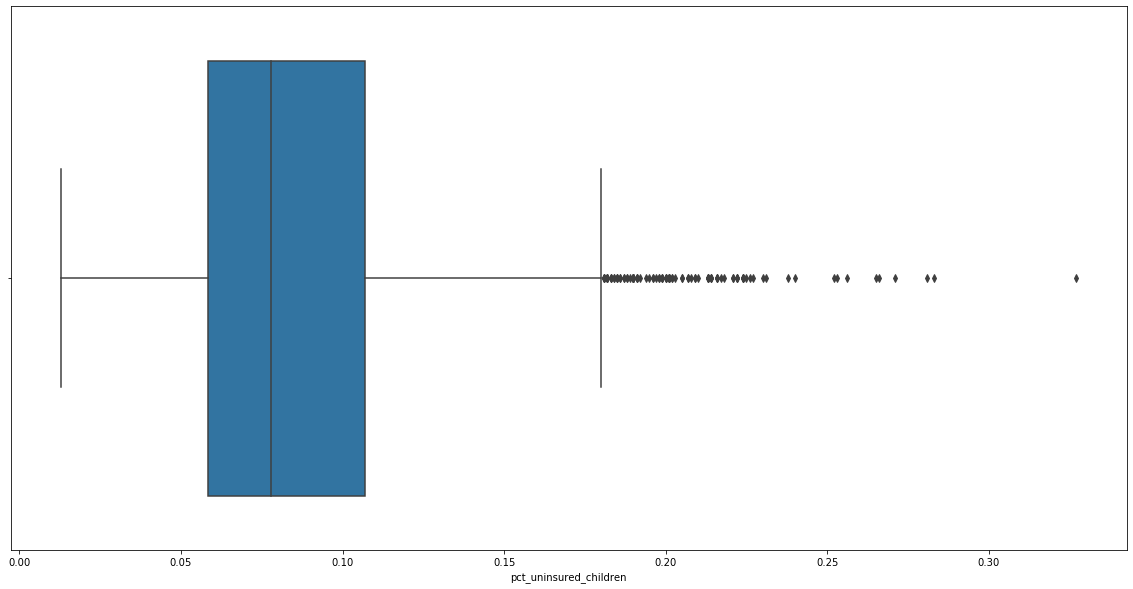

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_uninsured_children)
plt.show()

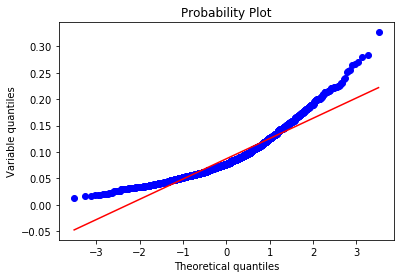

In [53]:
stats.probplot(trainset['pct_uninsured_children'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

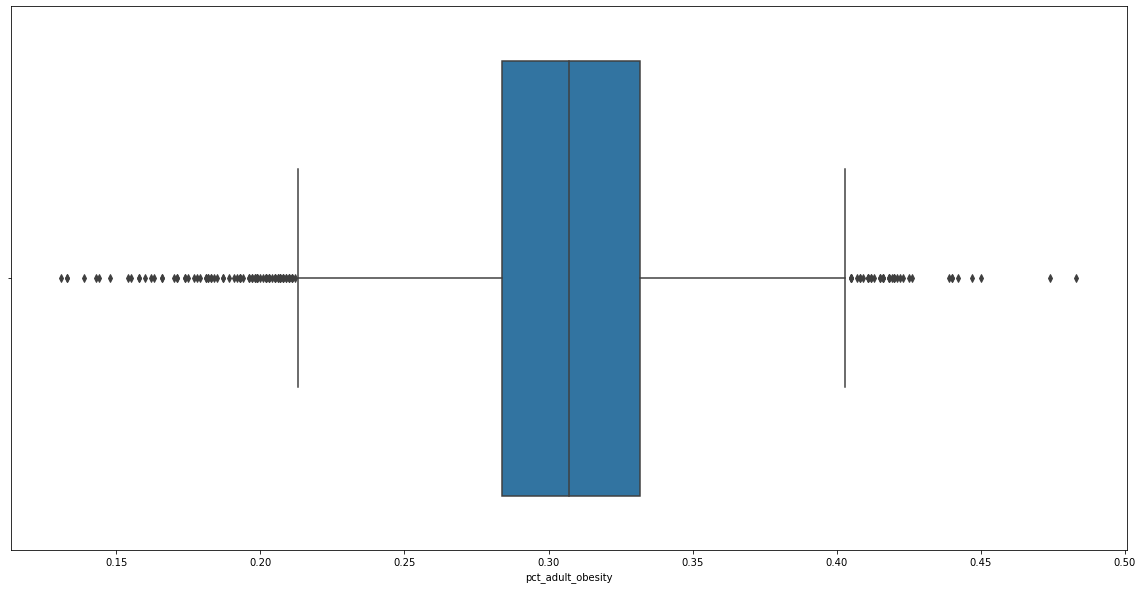

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_adult_obesity)
plt.show()

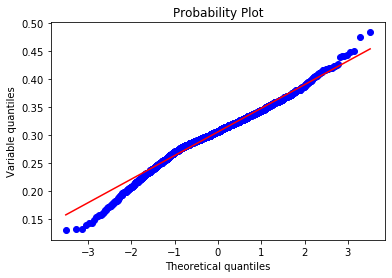

In [55]:
stats.probplot(trainset['pct_adult_obesity'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

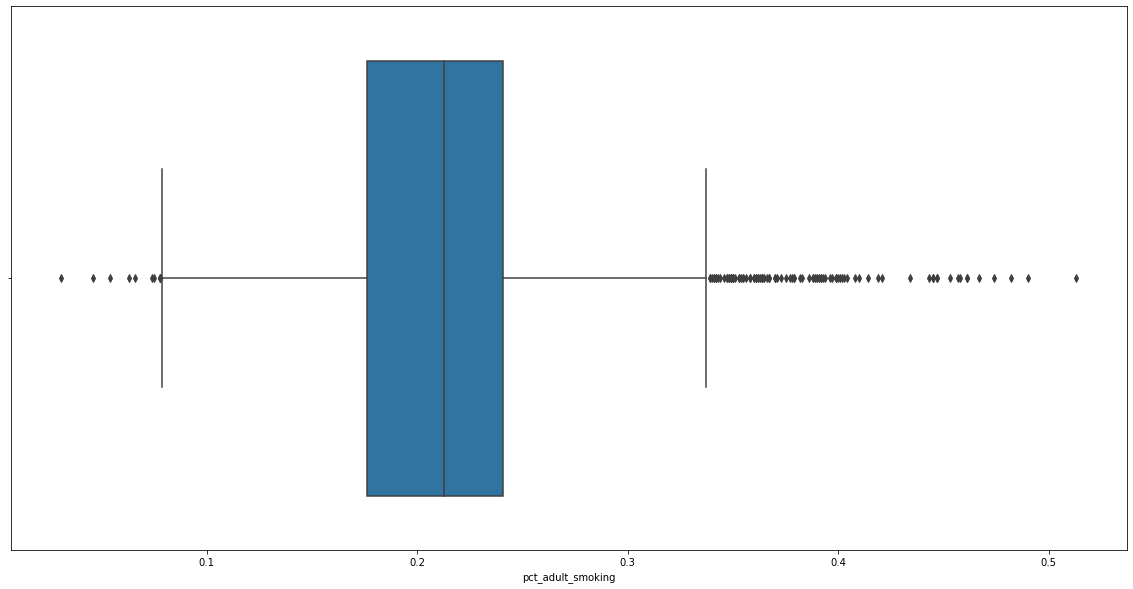

In [56]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_adult_smoking)
plt.show()

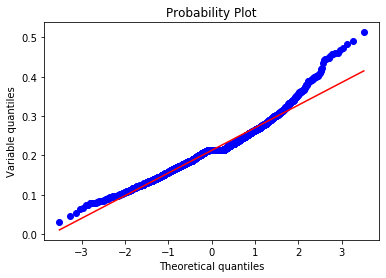

In [57]:
stats.probplot(trainset['pct_adult_smoking'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

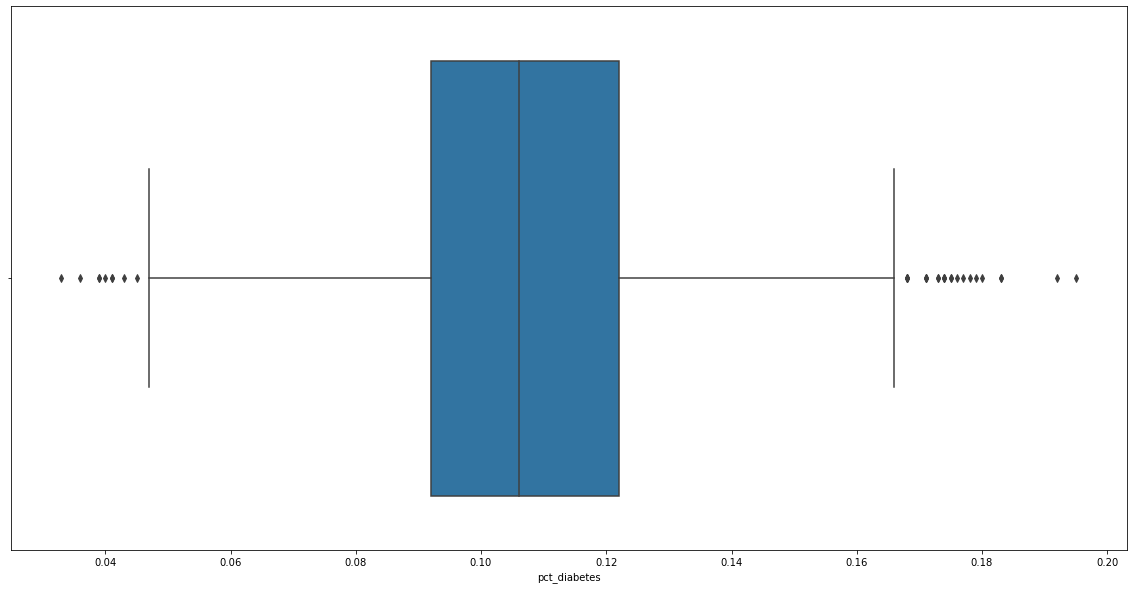

In [58]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_diabetes)
plt.show()

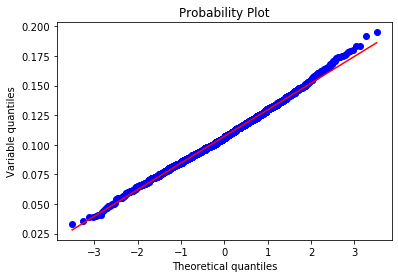

In [59]:
stats.probplot(trainset['pct_diabetes'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

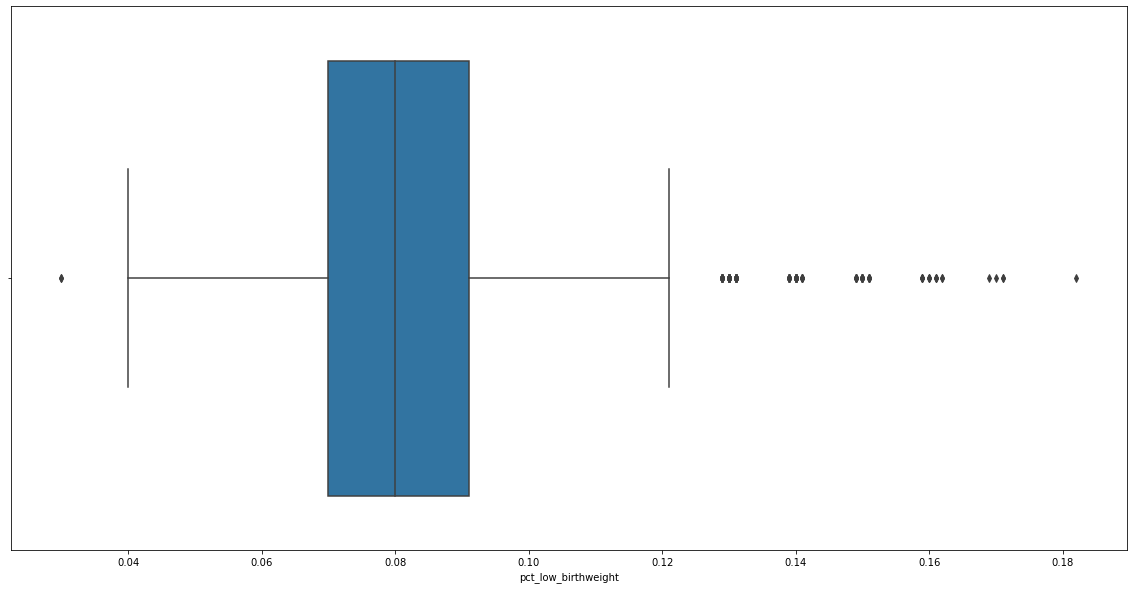

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_low_birthweight)
plt.show()

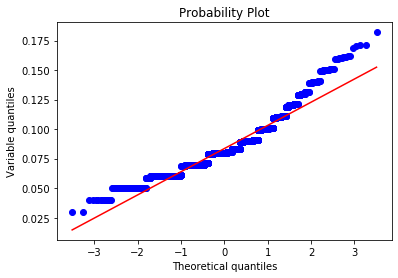

In [61]:
stats.probplot(trainset['pct_low_birthweight'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

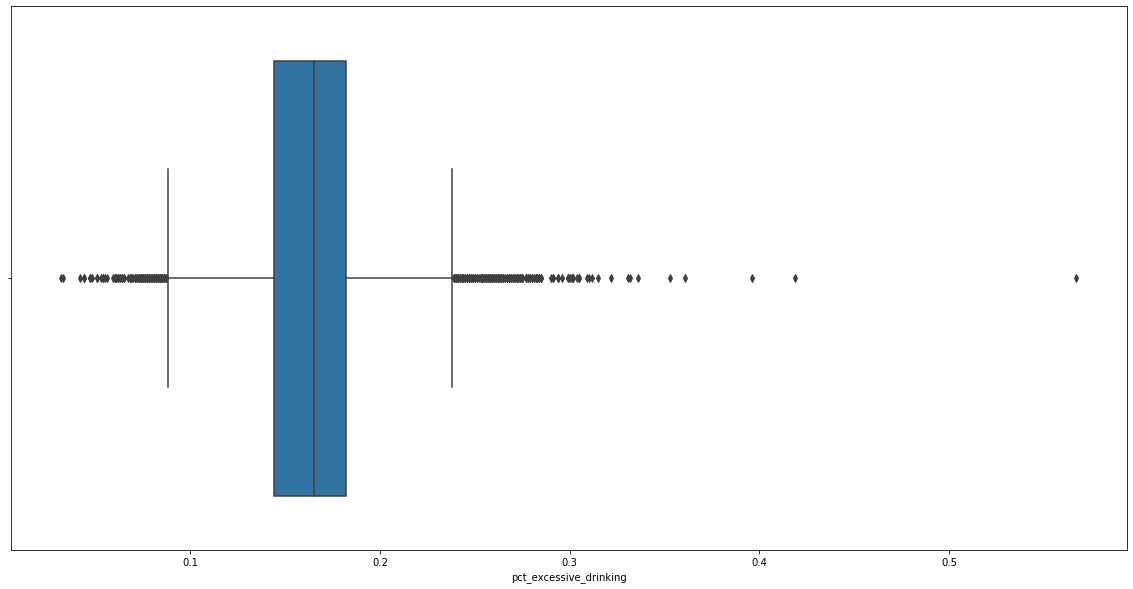

In [62]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_excessive_drinking)
plt.show()

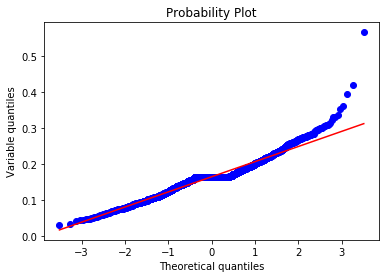

In [63]:
stats.probplot(trainset['pct_excessive_drinking'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

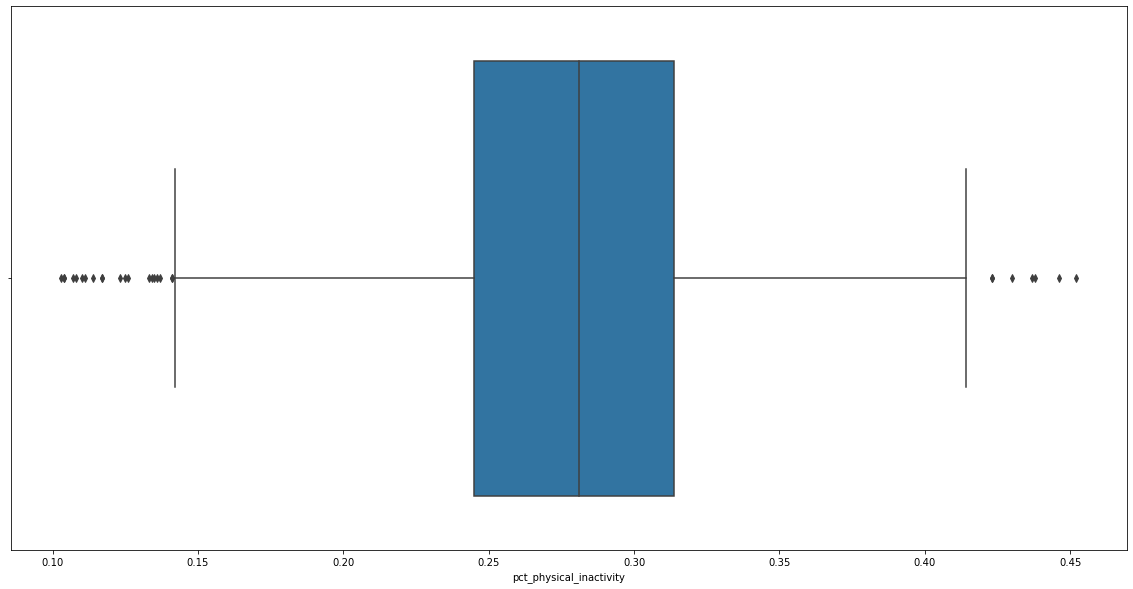

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_physical_inactivity)
plt.show()

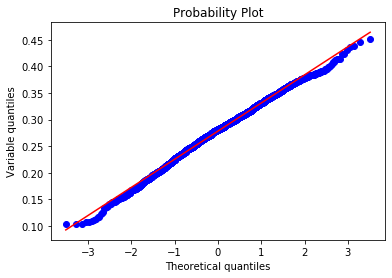

In [65]:
stats.probplot(trainset['pct_physical_inactivity'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

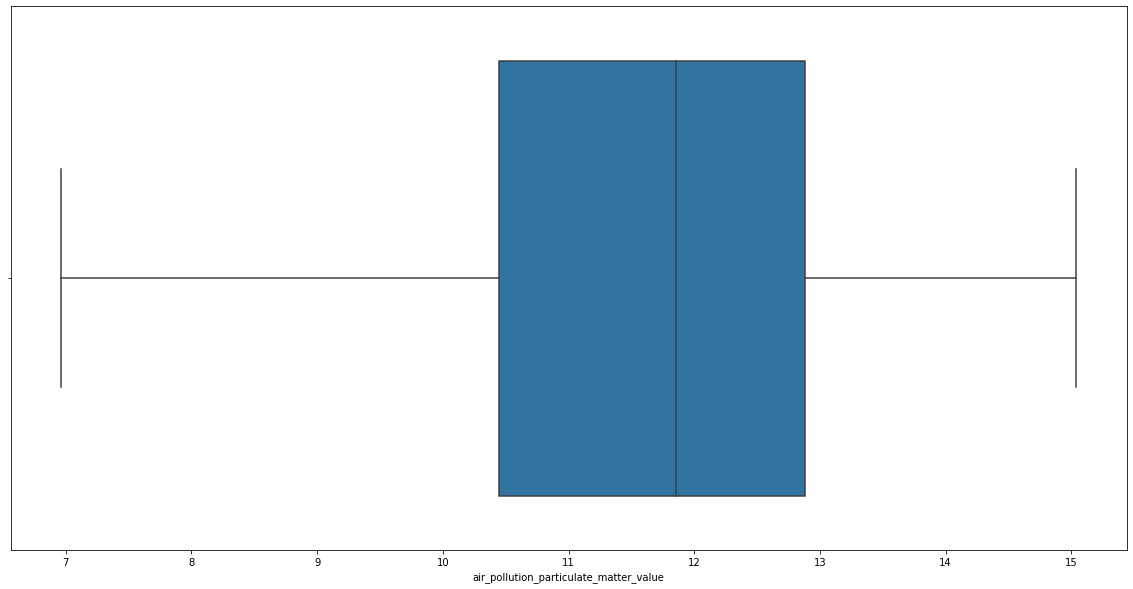

In [66]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.air_pollution_particulate_matter_value)
plt.show()

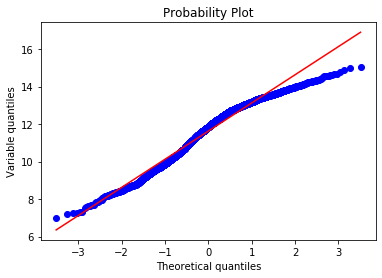

In [67]:
stats.probplot(trainset['air_pollution_particulate_matter_value'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [68]:
lower_boundary = trainset['air_pollution_particulate_matter_value'].quantile(0.05)
upper_boundary = trainset['air_pollution_particulate_matter_value'].quantile(0.95)
print(lower_boundary,upper_boundary)

8.828085706450002 13.693507658999994


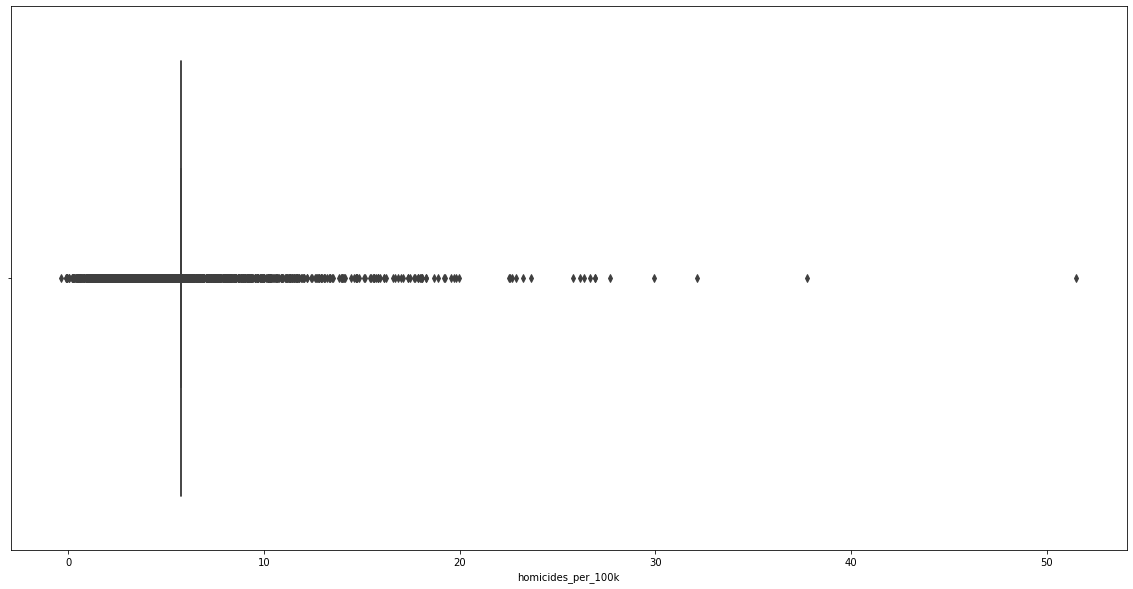

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.homicides_per_100k)
plt.show()

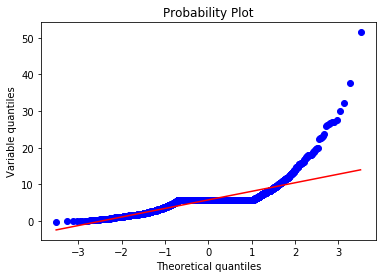

In [70]:
stats.probplot(trainset['homicides_per_100k'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [71]:
lower_boundary = trainset['homicides_per_100k'].quantile(0.05)
upper_boundary = trainset['homicides_per_100k'].quantile(0.95)
print(lower_boundary,upper_boundary)

1.75 10.221499999999997


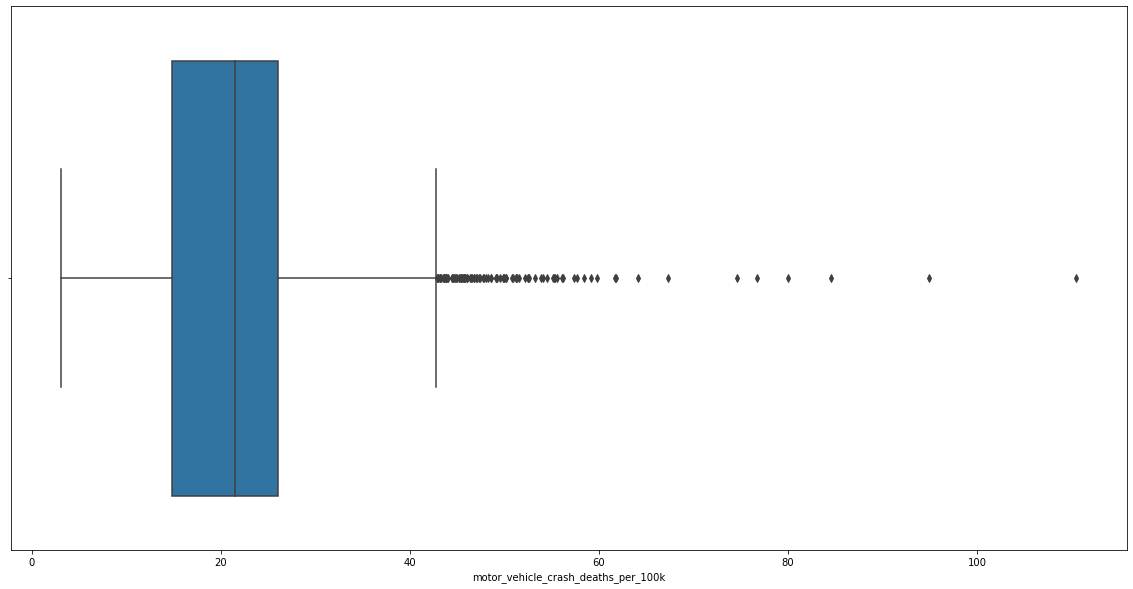

In [72]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.motor_vehicle_crash_deaths_per_100k)
plt.show()

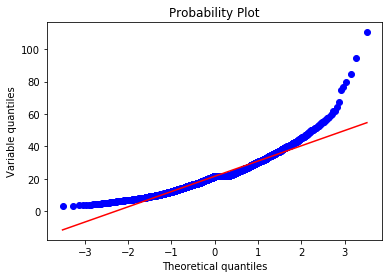

In [73]:
stats.probplot(trainset['motor_vehicle_crash_deaths_per_100k'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [74]:
lower_boundary = trainset['motor_vehicle_crash_deaths_per_100k'].quantile(0.05)
upper_boundary = trainset['motor_vehicle_crash_deaths_per_100k'].quantile(0.95)
print(lower_boundary,upper_boundary)

8.314 39.48299999999999


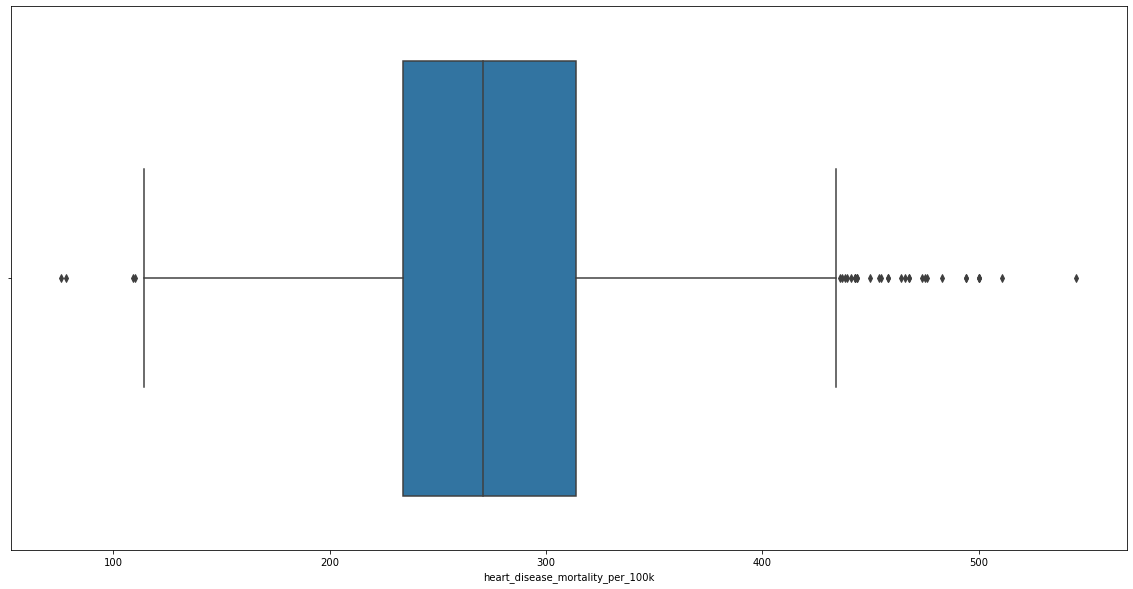

In [75]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.heart_disease_mortality_per_100k)
plt.show()

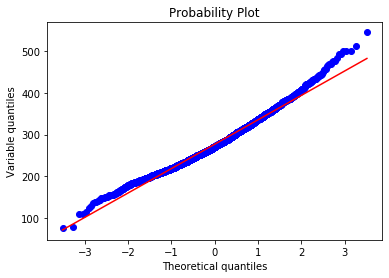

In [76]:
stats.probplot(trainset['heart_disease_mortality_per_100k'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [77]:
lower_boundary = trainset['heart_disease_mortality_per_100k'].quantile(0.05)
upper_boundary = trainset['heart_disease_mortality_per_100k'].quantile(0.95)
print(lower_boundary,upper_boundary)

193.0 382.0


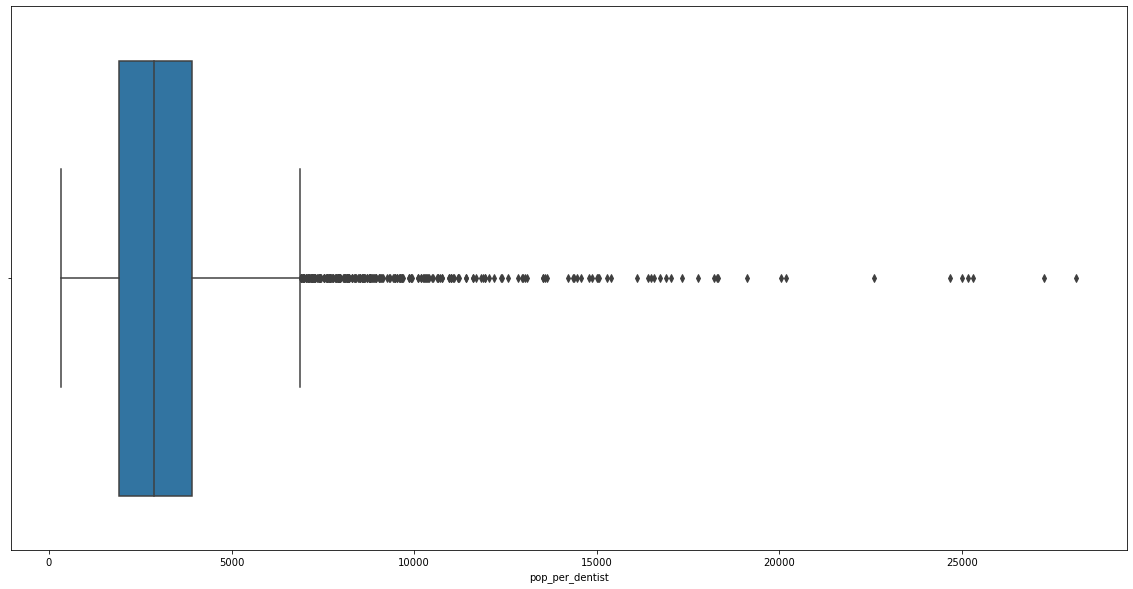

In [78]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pop_per_dentist)
plt.show()

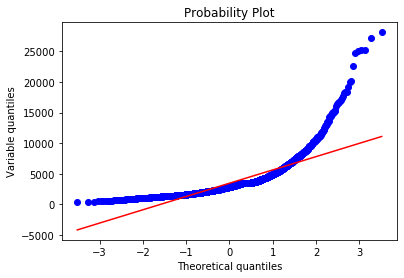

In [79]:
stats.probplot(trainset['pop_per_dentist'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [80]:
lower_boundary = trainset['pop_per_dentist'].quantile(0.05)
upper_boundary = trainset['pop_per_dentist'].quantile(0.95)
print(lower_boundary,upper_boundary)

1249.0 8102.999999999993


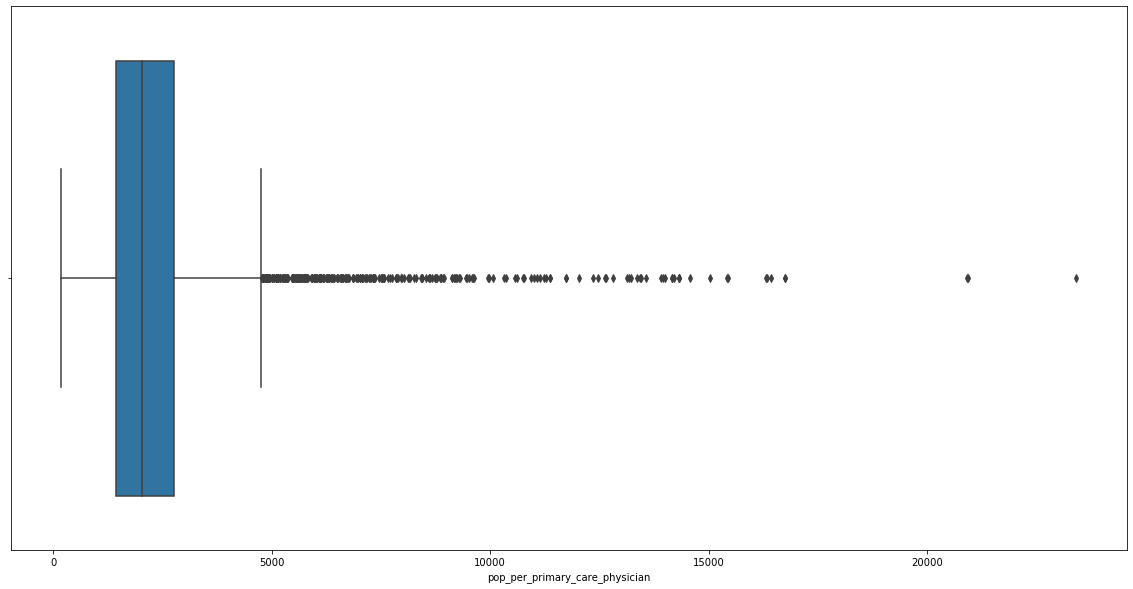

In [81]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pop_per_primary_care_physician)
plt.show()

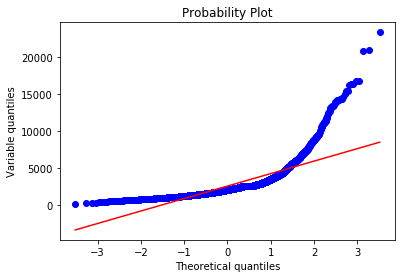

In [82]:
stats.probplot(trainset['pop_per_primary_care_physician'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [83]:
lower_boundary = trainset['pop_per_primary_care_physician'].quantile(0.05)
upper_boundary = trainset['pop_per_primary_care_physician'].quantile(0.95)
print(lower_boundary,upper_boundary)

900.0 6311.349999999997


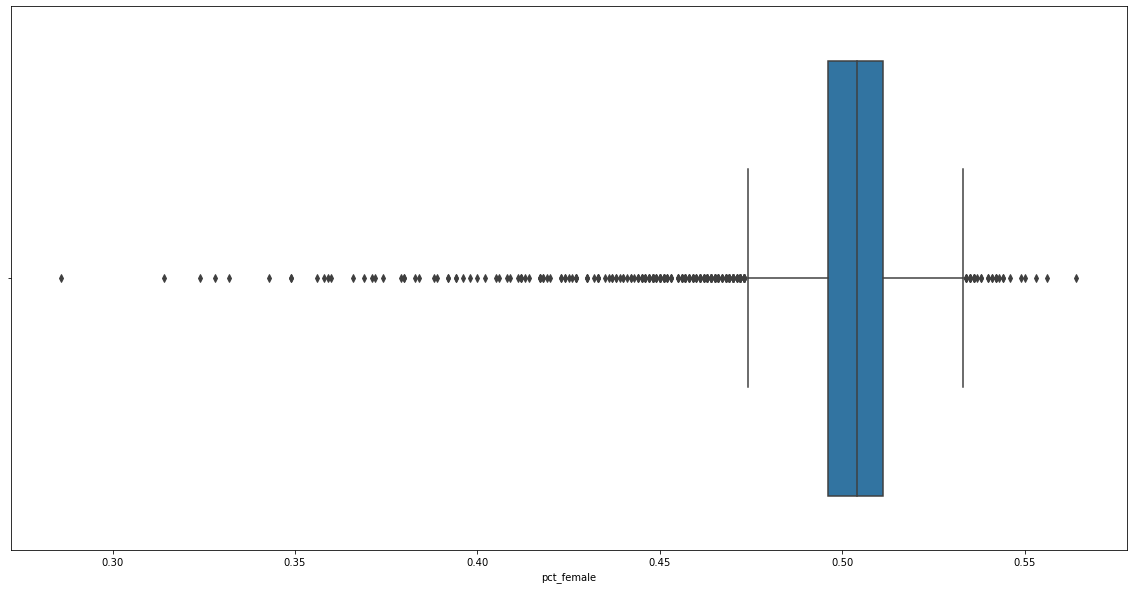

In [84]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_female)
plt.show()

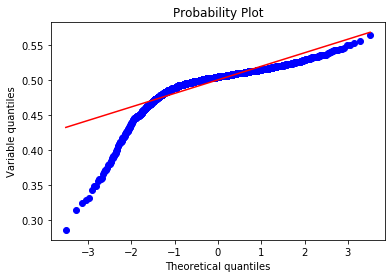

In [85]:
stats.probplot(trainset['pct_female'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

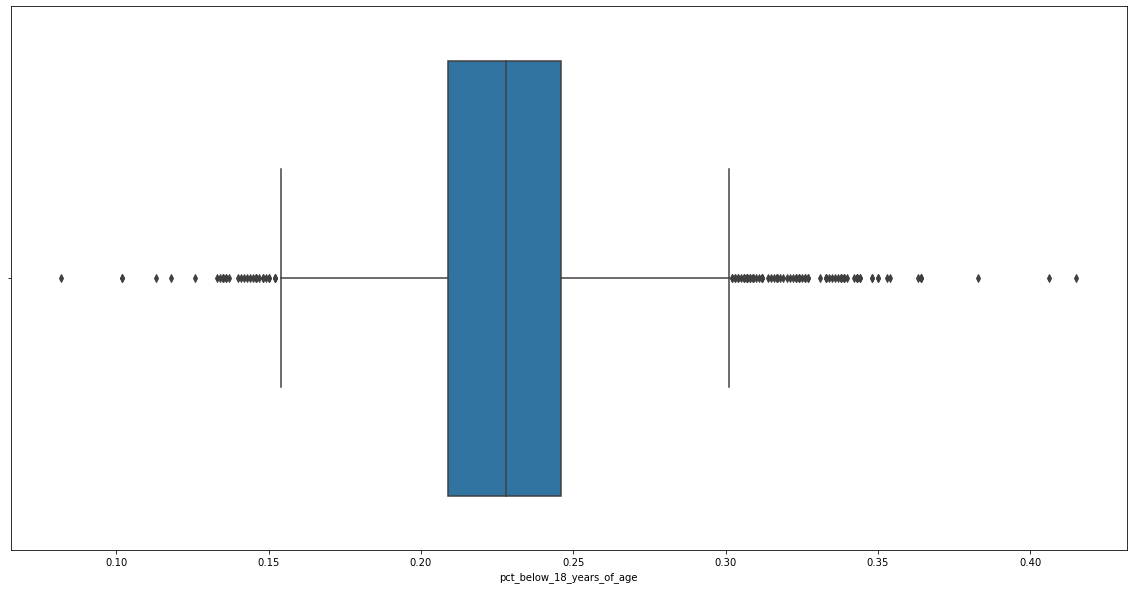

In [86]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_below_18_years_of_age)
plt.show()

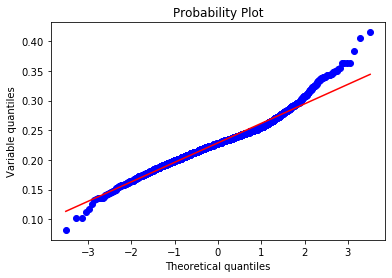

In [87]:
stats.probplot(trainset['pct_below_18_years_of_age'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

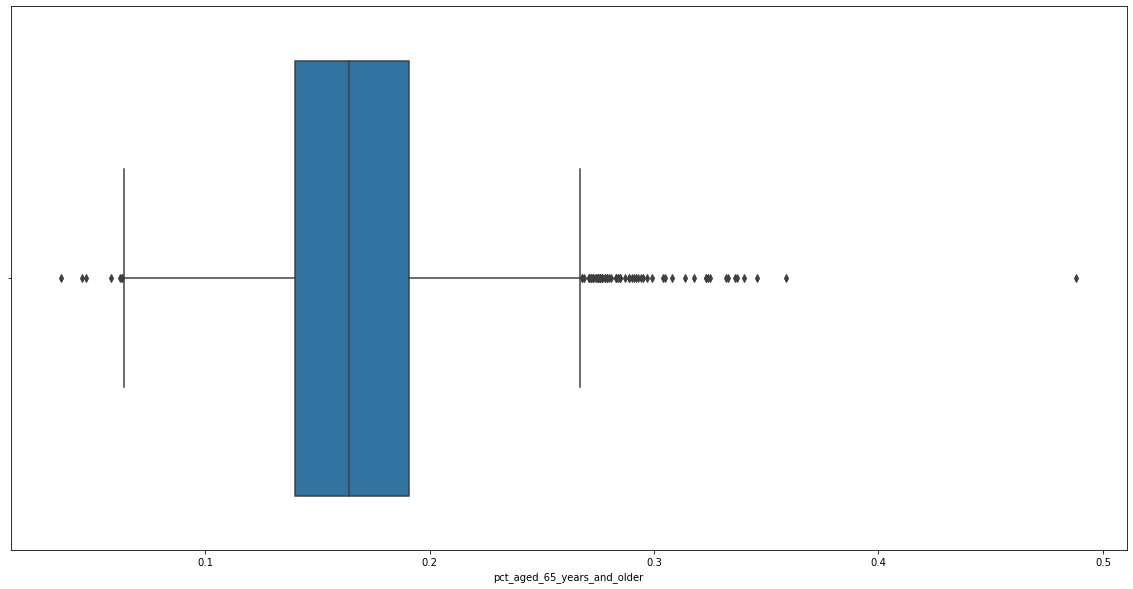

In [88]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_aged_65_years_and_older)
plt.show()

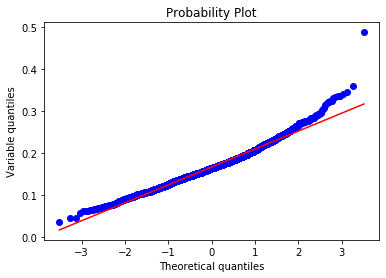

In [89]:
stats.probplot(trainset['pct_aged_65_years_and_older'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

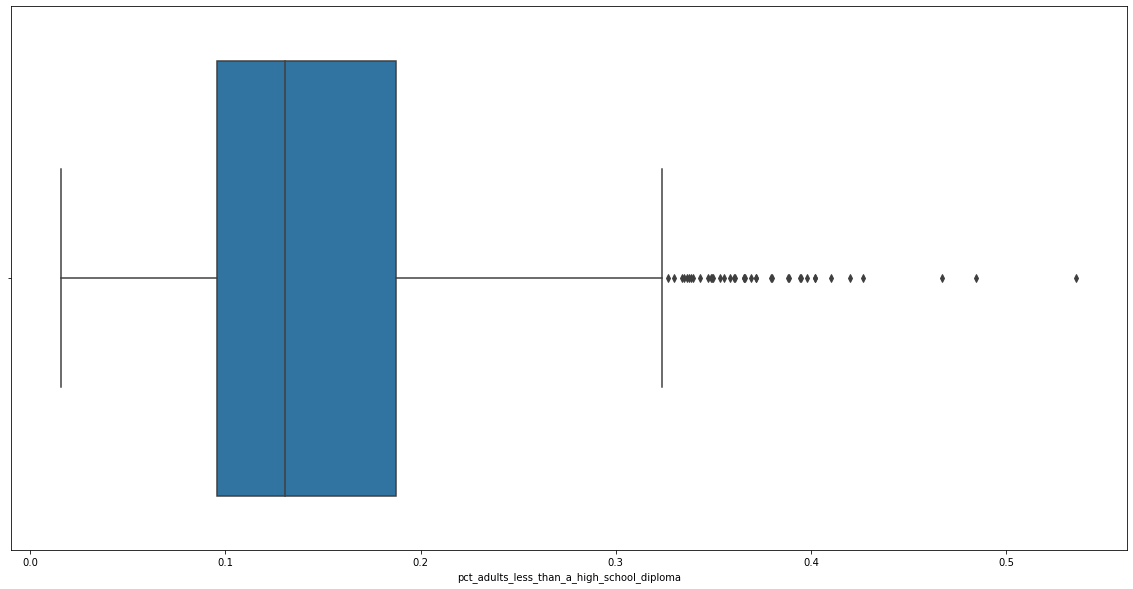

In [90]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_adults_less_than_a_high_school_diploma)
plt.show()

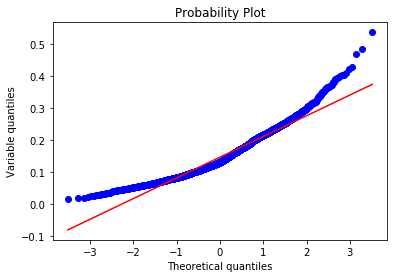

In [91]:
stats.probplot(trainset['pct_adults_less_than_a_high_school_diploma'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

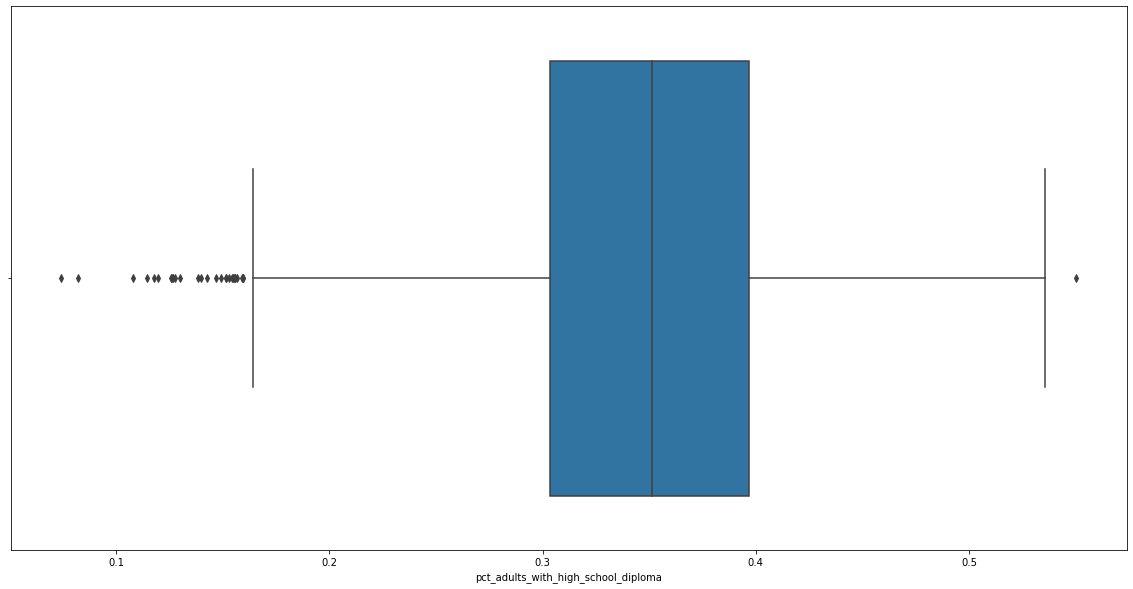

In [92]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_adults_with_high_school_diploma)
plt.show()

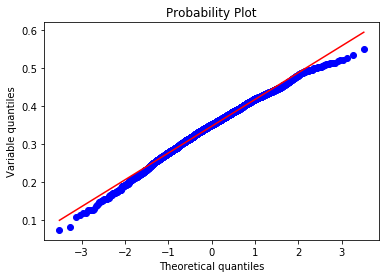

In [93]:
stats.probplot(trainset['pct_adults_with_high_school_diploma'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

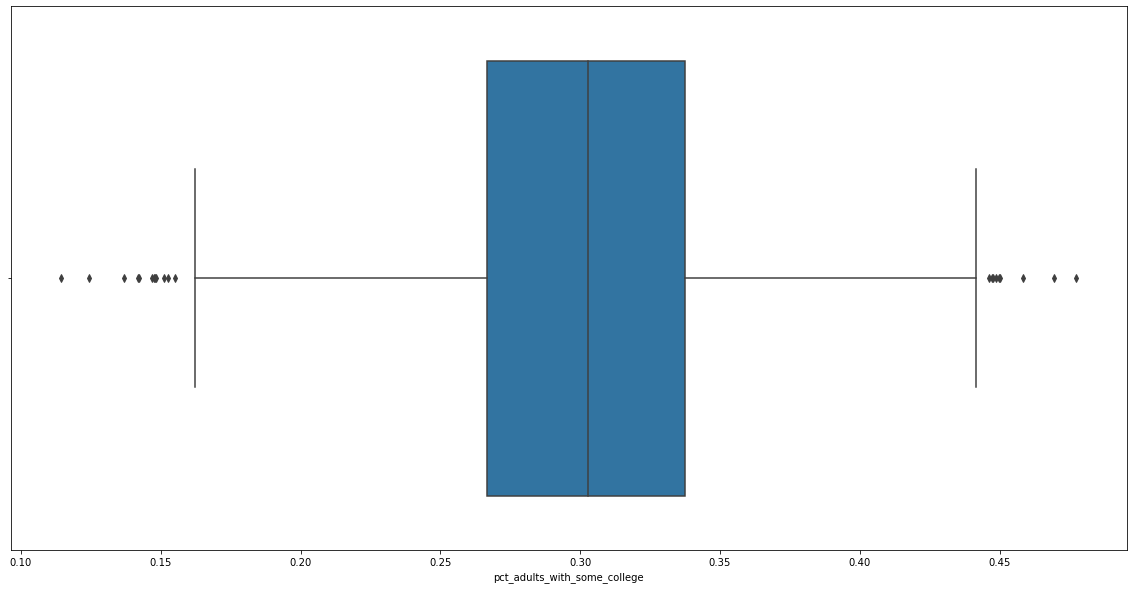

In [94]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_adults_with_some_college)
plt.show()

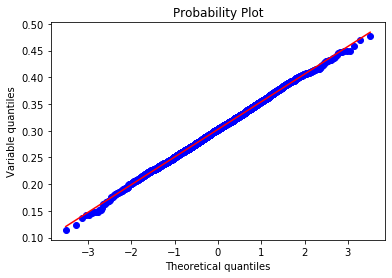

In [95]:
stats.probplot(trainset['pct_adults_with_some_college'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

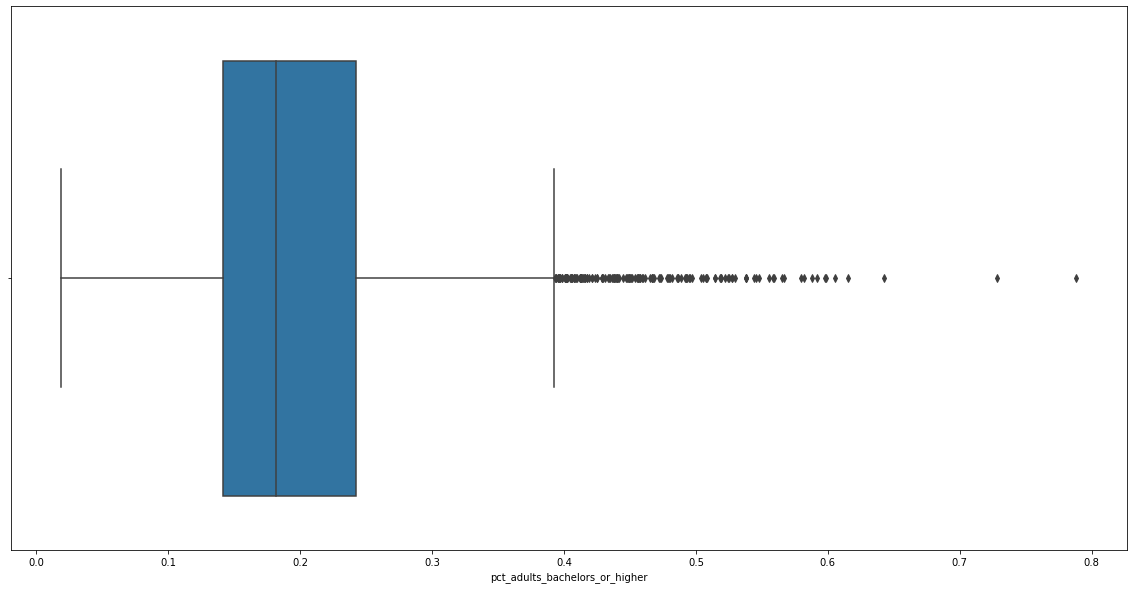

In [96]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.pct_adults_bachelors_or_higher)
plt.show()

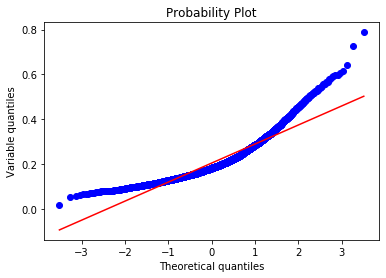

In [97]:
stats.probplot(trainset['pct_adults_bachelors_or_higher'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

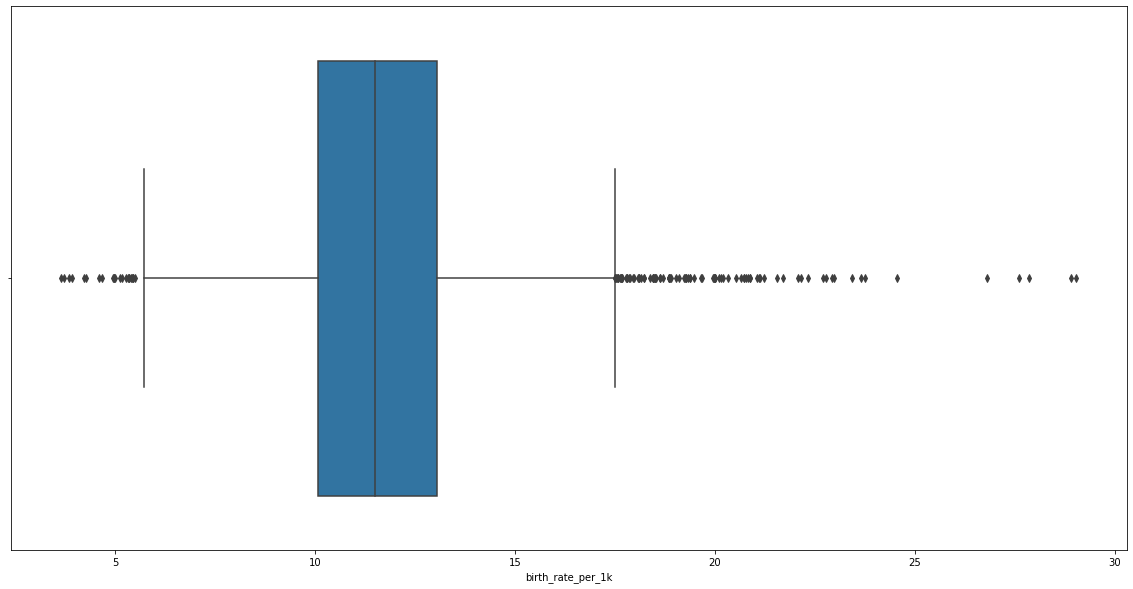

In [98]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.birth_rate_per_1k)
plt.show()

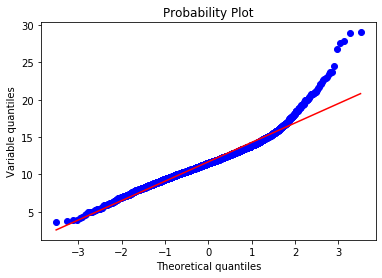

In [99]:
stats.probplot(trainset['birth_rate_per_1k'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [100]:
lower_boundary = trainset['birth_rate_per_1k'].quantile(0.05)
upper_boundary = trainset['birth_rate_per_1k'].quantile(0.95)
print(lower_boundary,upper_boundary)

7.9032771711 16.076747086999998


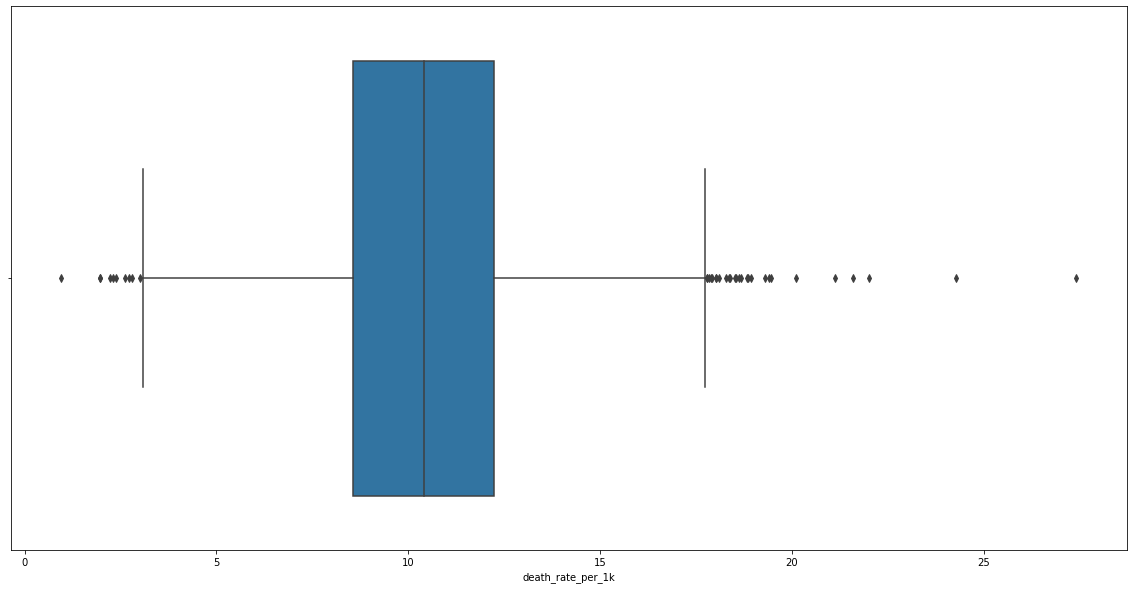

In [101]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.death_rate_per_1k)
plt.show()

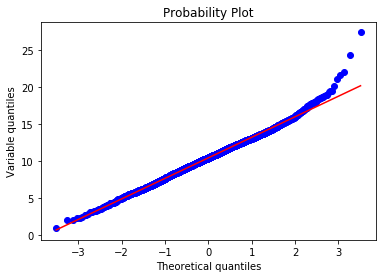

In [102]:
stats.probplot(trainset['death_rate_per_1k'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [103]:
lower_boundary = trainset['death_rate_per_1k'].quantile(0.05)
upper_boundary = trainset['death_rate_per_1k'].quantile(0.95)
print(lower_boundary,upper_boundary)

5.866491891750002 14.849801351499996


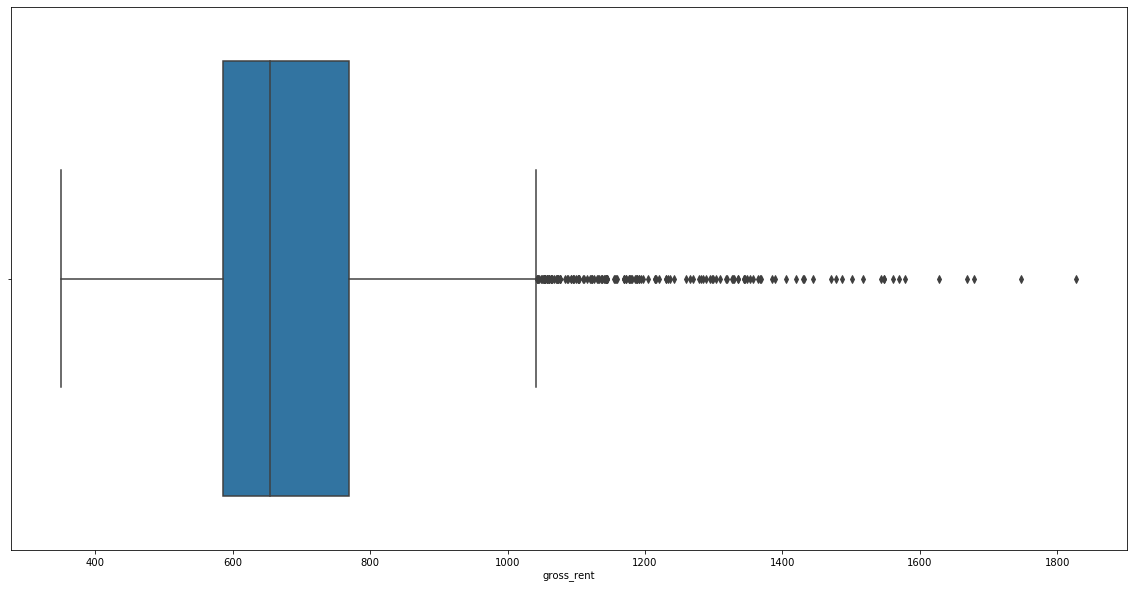

In [104]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset.gross_rent)
plt.show()

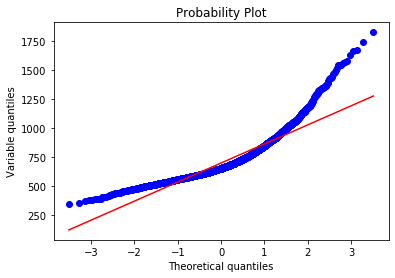

In [105]:
stats.probplot(trainset['gross_rent'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [106]:
lower_boundary = trainset['gross_rent'].quantile(0.05)
upper_boundary = trainset['gross_rent'].quantile(0.95)
print(lower_boundary,upper_boundary)

507.0 1040.2999999999993


### Use Feature Engine to start clipping outliers

In [107]:
windsoriser = Winsorizer(distribution='skewed', tail='both', fold=1.5, variables=None)

In [108]:
windsoriser.fit(trainset)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['population', 'renter_occupied_households',
                      'pct_renter_occupied', 'evictions', 'rent_burden',
                      'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
                      'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
                      'poverty_rate', 'pct_civilian_labor', 'pct_unemployment',
                      'pct_uninsured_adults', 'pct_uninsured_children',
                      'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
                      'pct_low_birthweight', 'pct_excessive_drinking',
                      'pct_physical_inactivity',
                      'air_pollution_particulate_matter_value',
                      'homicides_per_100k',
                      'motor_vehicle_crash_deaths_per_100k',
                      'heart_disease_mortality_per_100k', 'pop_per_dentist',
                      'pop_per_primary_care_physici

In [109]:
trainset_new = windsoriser.transform(trainset)

In [110]:
trainset_new

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,3876.0,408.0,24.583,363.391914,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.000000,0.005935,0.000000,4.172,0.5500,0.023,0.107,0.062000,0.310000,0.166,0.100,0.08353,0.239000,0.342000,11.022908,5.773744,21.546496,217.0,3469.825848,2564.36345,0.4735,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577.0
1,10224.0,1166.0,28.346,3.000000,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.000000,0.012033,0.000000,7.714,0.5450,0.040,0.324,0.180125,0.253000,0.102,0.066,0.07000,0.200000,0.148000,9.904099,5.773744,18.260000,181.0,2009.000000,1690.00000,0.4735,0.290,0.077,0.099099,0.202202,0.302302,0.392826,14.482893,3.048179,844.0
2,27023.0,2927.0,21.641,9.000000,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.000000,0.014809,0.000905,9.789,0.5080,0.063,0.129,0.032000,0.296000,0.215,0.087,0.07000,0.187000,0.258000,11.011502,5.773744,19.940000,234.0,4650.000000,1350.00000,0.4960,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700.0
3,8735.0,1039.0,23.110,0.000000,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.000000,0.022999,0.000000,13.735,0.5450,0.038,0.207,0.084000,0.255000,0.182,0.104,0.08100,0.169000,0.274000,12.845770,5.773744,30.310000,231.0,4420.000000,1749.00000,0.5030,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592.0
4,3681.0,365.0,21.985,2.000000,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.000000,0.016905,0.002202,8.217,0.4740,0.034,0.177,0.075000,0.324000,0.118,0.113,0.08353,0.178000,0.340000,11.565750,5.773744,21.546496,270.0,3469.825848,1249.00000,0.5160,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,44414.0,6275.0,35.026,254.000000,30.569,0.726121,0.019125,0.054938,0.013462,0.005045,0.000301,0.038349,0.000201,13.606,0.4010,0.048,0.300,0.131000,0.333000,0.259,0.117,0.08000,0.091000,0.297000,10.200021,5.773744,25.890000,330.0,2779.000000,2530.00000,0.5110,0.233,0.165,0.158683,0.332335,0.295409,0.213573,13.675599,11.802539,671.0
3134,16160.0,1871.0,31.922,363.391914,33.899,0.663196,0.245878,0.015262,0.001817,0.001717,0.000000,0.004257,0.002795,20.052,0.4500,0.059,0.254,0.062000,0.355000,0.195,0.111,0.10000,0.164986,0.333000,10.897362,5.773744,30.340000,347.0,6877.500000,4754.00000,0.4950,0.227,0.176,0.210159,0.419323,0.240040,0.130478,10.286142,13.278474,612.0
3135,28688.0,4478.0,33.897,363.391914,28.644,0.809853,0.011596,0.147624,0.001816,0.009389,0.001247,0.005427,0.002795,6.418,0.6525,0.034,0.231,0.132000,0.212375,0.096,0.047,0.11000,0.239000,0.141875,12.726635,5.773744,10.740000,114.0,1229.000000,959.00000,0.4735,0.170,0.094,0.051793,0.173307,0.288845,0.392826,9.229493,3.048179,1007.0
3136,29234.0,4528.0,40.479,57.000000,24.803,0.707838,0.030869,0.160475,0.013462,0.014104,0.000700,0.038349,0.000000,12.429,0.5320,0.031,0.286,0.133000,0.287000,0.161,0.108,0.08000,0.107000,0.335000,9.967003,5.773744,18.860000,349.0,2139.000000,1849.00000,0.5010,0.237,0.131,0.137412,0.350050,0.243731,0.268806,16.695002,9.758586,713.0


In [111]:
trainset_new.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3.138000e+03,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,48594.989404,5635.185309,28.352035,202.180860,28.508608,0.775189,0.067219,0.064820,0.004461,0.008526,0.000311,0.016363,0.000712,12.063339,0.470684,0.062047,0.217178,0.086234,0.306036,0.211240,0.107055,0.082738,0.163773,0.278541,11.626925,5.773744e+00,21.281155,276.565966,3209.132891,2290.829034,0.502370,0.228150,0.166919,0.145049,0.347727,0.302668,0.200627,11.616462,10.391104,691.874920
std,50775.943502,6098.364390,7.360898,254.551216,4.327197,0.192870,0.086407,0.062854,0.004496,0.008372,0.000447,0.009388,0.000901,5.279560,0.067698,0.021198,0.065005,0.037310,0.039831,0.054107,0.022231,0.018134,0.037472,0.052406,1.522444,9.860352e-14,8.855640,57.764658,1643.901093,1134.984054,0.013689,0.030619,0.041162,0.064217,0.070022,0.051386,0.079345,2.395349,2.725338,148.598933
min,117.000000,15.000000,9.083875,-1.000000,18.072375,0.242593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288500,0.012000,0.039000,0.013000,0.212375,0.078500,0.047000,0.038500,0.087000,0.141875,6.965724,5.773744e+00,3.140000,114.000000,340.000000,190.000000,0.473500,0.153500,0.063500,0.015984,0.162897,0.160325,0.018924,5.601441,3.048179,351.000000
25%,11065.750000,1142.750000,23.107000,8.000000,25.955250,0.657212,0.005606,0.018718,0.001189,0.002402,0.000000,0.009741,0.000000,8.063250,0.425000,0.046000,0.169000,0.058250,0.284000,0.176000,0.092000,0.070000,0.144000,0.245000,10.449944,5.773744e+00,14.885000,234.000000,1930.000000,1429.000000,0.496000,0.209000,0.140000,0.095522,0.303326,0.266733,0.141752,10.063759,8.561913,586.000000
50%,25879.500000,2812.000000,27.289500,73.000000,28.745000,0.846237,0.020915,0.037449,0.002596,0.005386,0.000000,0.014736,0.000301,11.335000,0.472000,0.060000,0.215000,0.078000,0.307000,0.212639,0.106000,0.080000,0.164986,0.281000,11.858134,5.773744e+00,21.546496,271.000000,2879.000000,2039.000000,0.504000,0.228000,0.164000,0.130565,0.351500,0.302849,0.181546,11.510979,10.415358,654.000000
75%,67707.750000,7892.750000,32.455750,363.391914,31.210500,0.933625,0.101715,0.090298,0.006099,0.012019,0.000499,0.021184,0.001118,15.105000,0.516000,0.075000,0.261000,0.107000,0.331750,0.241000,0.122000,0.091000,0.182000,0.313750,12.879822,5.773744e+00,26.057500,314.000000,3909.000000,2759.000000,0.511000,0.246000,0.191000,0.187438,0.396945,0.337672,0.242182,13.038637,12.237736,768.750000
max,152670.750000,18017.750000,46.478875,896.479784,39.093375,0.997596,0.245878,0.197669,0.013462,0.026446,0.001247,0.038349,0.002795,25.667625,0.652500,0.118500,0.399000,0.180125,0.403375,0.338500,0.167000,0.122500,0.239000,0.416875,15.037129,5.773744e+00,42.816250,434.000000,6877.500000,4754.000000,0.533500,0.301500,0.267500,0.325311,0.537374,0.444080,0.392826,17.5009

### Use MinMaxScaler to clip outliers

In [112]:
normalize = MinMaxScaler()

In [113]:
newdf = normalize.fit_transform(trainset)

In [114]:
newdf

array([[3.75143336e-04, 2.23262219e-04, 2.35624123e-01, ...,
        2.50382065e-01, 3.32546690e-01, 1.53116531e-01],
       [1.00866552e-03, 6.53879934e-04, 2.86863928e-01, ...,
        4.26653373e-01, 7.76262901e-02, 3.34010840e-01],
       [2.68518398e-03, 1.65429919e-03, 1.95563665e-01, ...,
        2.35069875e-01, 3.74959387e-01, 2.36449864e-01],
       ...,
       [2.85134883e-03, 2.53541802e-03, 3.62450469e-01, ...,
        2.19670310e-01, 5.38683439e-02, 4.44444444e-01],
       [2.90583892e-03, 2.56382289e-03, 4.52075872e-01, ...,
        5.13810094e-01, 3.32782869e-01, 2.45257453e-01],
       [3.91111129e-04, 1.77246342e-04, 1.46693174e-01, ...,
        2.88724861e-01, 2.46887217e-01, 1.63956640e-01]])

In [115]:
newdf = pd.DataFrame(newdf,columns=trainset.columns)

In [116]:
newdf

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,0.000375,0.000223,0.235624,0.012457,0.213075,0.947724,0.012531,0.026380,0.006969,0.013479,0.000000,0.025236,0.000000,0.094535,0.447174,0.047826,0.141372,0.156051,0.508523,0.280083,0.413580,0.352168,0.429907,0.684814,0.502661,0.117958,0.171526,0.300640,0.112628,0.102304,0.665468,0.408408,0.340708,0.129415,0.533063,0.757019,0.234878,0.250382,0.332547,0.153117
1,0.001009,0.000654,0.286864,0.000137,0.422200,0.809082,0.002660,0.175704,0.002211,0.003571,0.000000,0.051165,0.000000,0.174794,0.441032,0.121739,0.592516,0.598726,0.346591,0.147303,0.203704,0.263158,0.314019,0.128940,0.364047,0.117958,0.140900,0.223881,0.060060,0.064630,0.669065,0.624625,0.090708,0.159909,0.268762,0.517644,0.490715,0.426653,0.077626,0.334011
2,0.002685,0.001654,0.195564,0.000342,0.531215,0.958529,0.005986,0.013260,0.005796,0.011261,0.000000,0.062965,0.046236,0.221812,0.395577,0.221739,0.187110,0.060510,0.468750,0.381743,0.333333,0.263158,0.289720,0.444126,0.501248,0.117958,0.156556,0.336887,0.155097,0.049981,0.755396,0.378378,0.345133,0.234222,0.657546,0.388640,0.260828,0.235070,0.374959,0.236450
3,0.000860,0.000582,0.215567,0.000034,0.448360,0.895997,0.000348,0.077581,0.001219,0.010278,0.000000,0.097789,0.000000,0.311225,0.441032,0.113043,0.349272,0.226115,0.352273,0.313278,0.438272,0.335526,0.256075,0.489971,0.728503,0.117958,0.253192,0.330490,0.146821,0.067172,0.780576,0.333333,0.396018,0.117688,0.492369,0.783556,0.255459,0.225727,0.374855,0.163279
4,0.000356,0.000199,0.200248,0.000103,0.245598,0.925399,0.000578,0.043452,0.000000,0.032581,0.000000,0.071881,0.112473,0.186191,0.353808,0.095652,0.286902,0.197452,0.548295,0.180498,0.493827,0.352168,0.272897,0.679083,0.569916,0.117958,0.171526,0.413646,0.112628,0.045629,0.827338,0.420420,0.429204,0.147284,0.604937,0.638802,0.234106,0.232034,0.520607,0.063008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,0.004421,0.003556,0.377824,0.008717,0.519670,0.725242,0.022271,0.055660,0.176332,0.012066,0.002706,0.214363,0.010243,0.308302,0.264128,0.156522,0.542620,0.375796,0.573864,0.473029,0.518519,0.328947,0.110280,0.555874,0.400711,0.115956,0.212003,0.541578,0.087769,0.100823,0.809353,0.453453,0.285398,0.274544,0.542207,0.498649,0.253044,0.394846,0.410099,0.216802
3134,0.001601,0.001054,0.335557,0.012457,0.603431,0.661556,0.353394,0.015462,0.002228,0.004107,0.000000,0.018102,0.525049,0.454364,0.324324,0.204348,0.446985,0.156051,0.636364,0.340249,0.481481,0.460526,0.248571,0.659026,0.487107,0.117958,0.253471,0.577825,0.297960,0.343401,0.751799,0.435435,0.309735,0.373582,0.724990,0.346067,0.145020,0.261302,0.465929,0.176829
3135,0.002851,0.002535,0.362450,0.012457,0.471250,0.809986,0.013504,0.149562,0.002226,0.022458,0.034465,0.023076,0.534303,0.145427,0.626536,0.095652,0.399168,0.378981,0.036932,0.134855,0.037037,0.526316,0.558879,0.040115,0.713743,0.117958,0.070823,0.004264,0.031991,0.033134,0.593525,0.264264,0.128319,0.068894,0.208045,0.480559,0.607273,0.219670,0.053868,0.444444
3136,0.002906,0.002564,0.452076,0.001983,0.374635,0.706738,0.035947,0.162582,0.030837,0.033734,0.006297,0.258762,0.000000,0.28163

In [117]:
newdf.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,0.010050,0.007923,0.289848,0.012457,0.467987,0.773086,0.103524,0.089497,0.020964,0.029980,0.006949,0.076859,0.045132,0.276519,0.350883,0.219326,0.371139,0.236128,0.496019,0.376844,0.457403,0.352168,0.248571,0.502727,0.577496,0.117958,0.171526,0.428256,0.112628,0.102304,0.769657,0.440516,0.290869,0.249540,0.574071,0.518549,0.240837,0.316474,0.357156,0.236786
std,0.032234,0.030694,0.109826,0.041379,0.114894,0.200721,0.167635,0.136783,0.085740,0.063045,0.035757,0.072338,0.083146,0.129905,0.089057,0.098630,0.137455,0.127738,0.120360,0.121399,0.138816,0.133591,0.081151,0.151582,0.188622,0.057001,0.091192,0.125447,0.092498,0.089411,0.080603,0.099870,0.095234,0.127758,0.148593,0.142428,0.117197,0.104831,0.105229,0.119110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001093,0.000641,0.215526,0.000308,0.403618,0.655500,0.006528,0.018964,0.001458,0.005744,0.000000,0.041420,0.000000,0.182708,0.293612,0.147826,0.270270,0.144108,0.434659,0.300830,0.364198,0.263158,0.209346,0.406877,0.431675,0.117958,0.109449,0.336887,0.057217,0.053384,0.755396,0.381381,0.230088,0.153027,0.481250,0.419626,0.159676,0.252540,0.287516,0.159214
50%,0.002571,0.001589,0.272478,0.002530,0.473790,0.846811,0.024356,0.037940,0.003182,0.012883,0.000000,0.062656,0.015363,0.256843,0.351351,0.208696,0.365904,0.207006,0.500000,0.376844,0.450617,0.328947,0.248571,0.510029,0.606141,0.117958,0.171526,0.415778,0.091367,0.079667,0.784173,0.438438,0.283186,0.220447,0.582476,0.519150,0.211409,0.309560,0.357627,0.205285
75%,0.006745,0.004475,0.342825,0.012457,0.535806,0.935256,0.118448,0.091484,0.007475,0.028748,0.004486,0.090075,0.057083,0.342269,0.405405,0.273913,0.461538,0.299363,0.570312,0.435685,0.549383,0.401316,0.280374,0.603868,0.732722,0.117958,0.213564,0.507463,0.128432,0.110690,0.809353,0.492492,0.342920,0.329867,0.677969,0.615113,0.290236,0.369750,0.426562,0.283028
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
newdf.shape

(3138, 40)

### Check affected features after outlier treatment

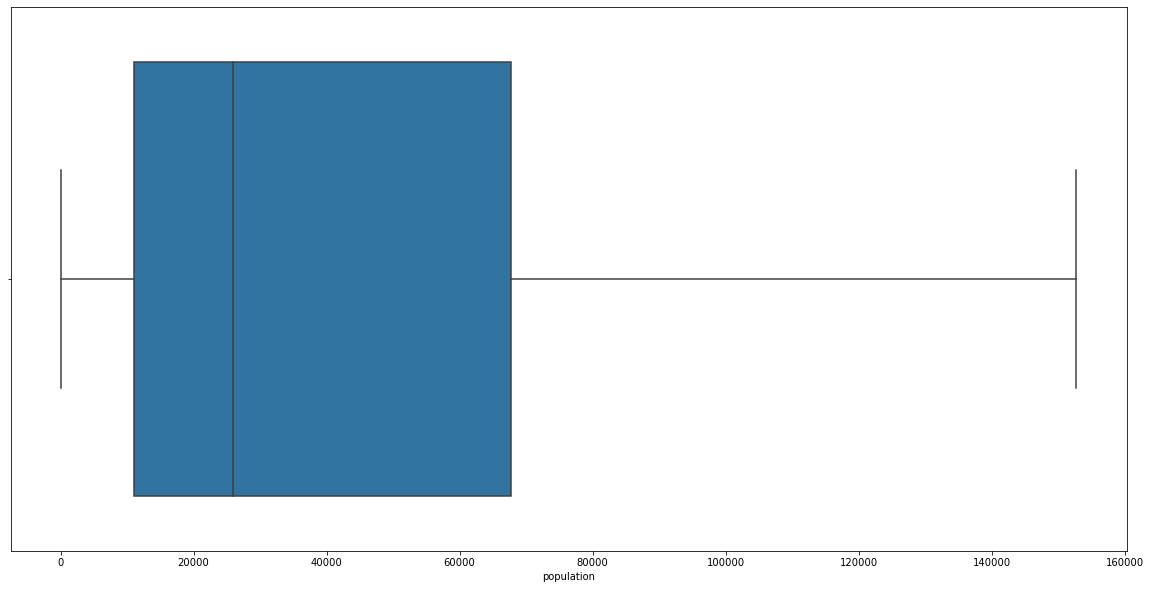

In [119]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.population)
plt.show()

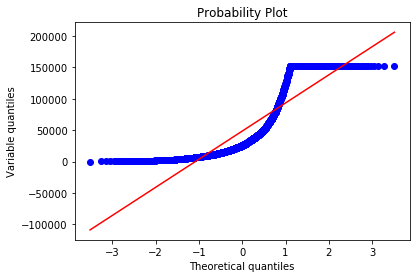

In [120]:
stats.probplot(trainset_new['population'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

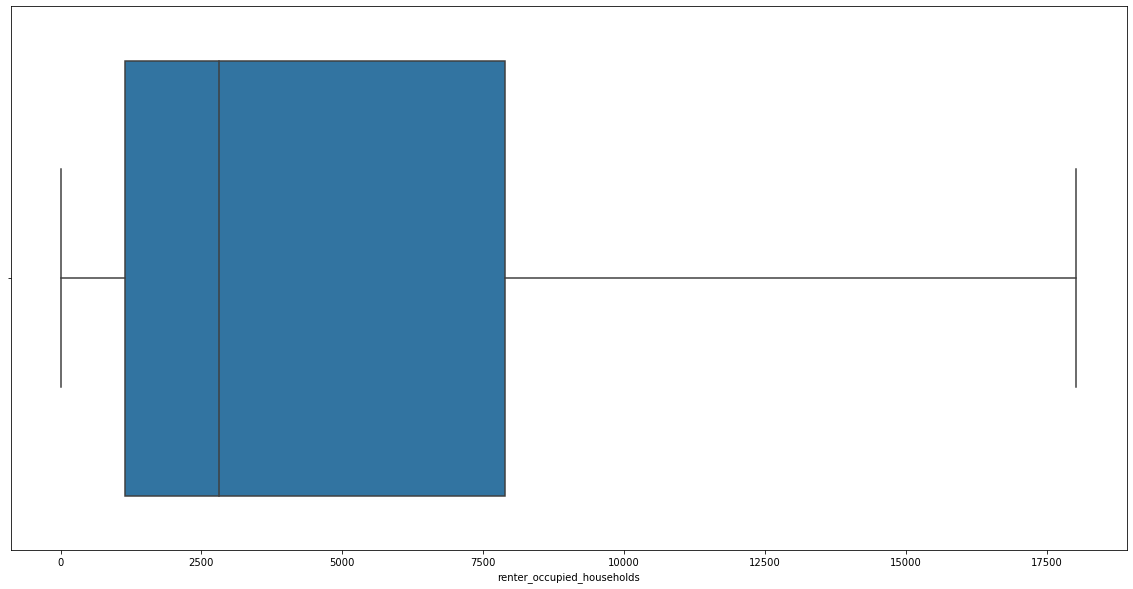

In [121]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.renter_occupied_households)
plt.show()

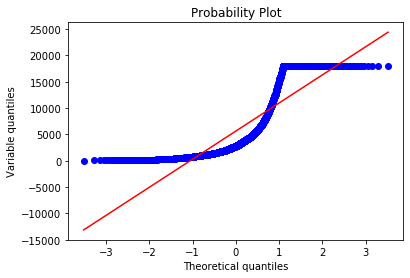

In [122]:
stats.probplot(trainset_new['renter_occupied_households'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

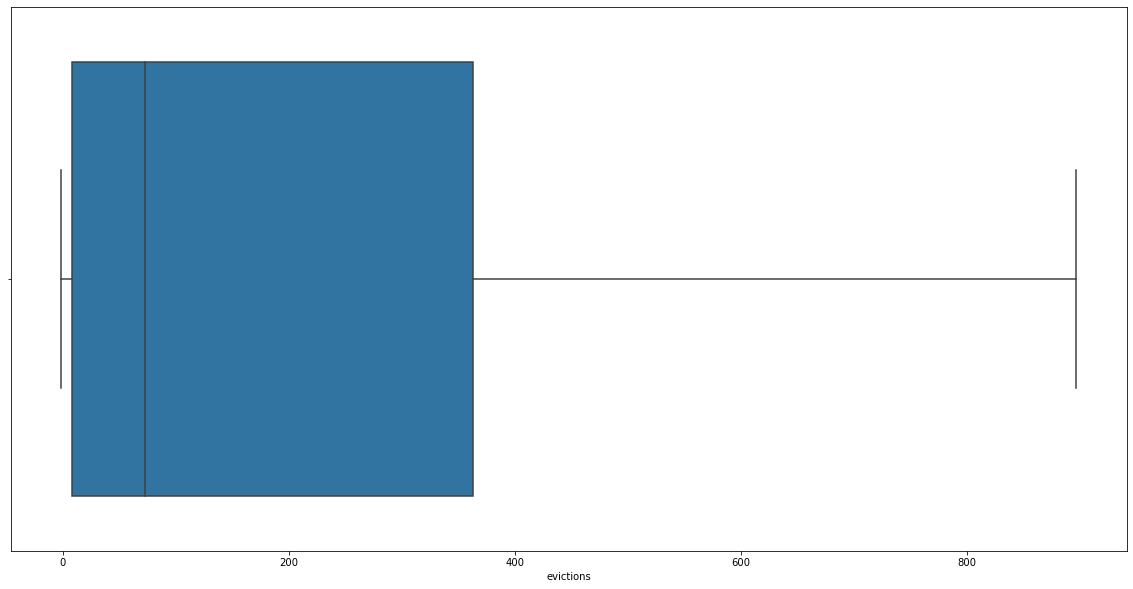

In [123]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.evictions)
plt.show()

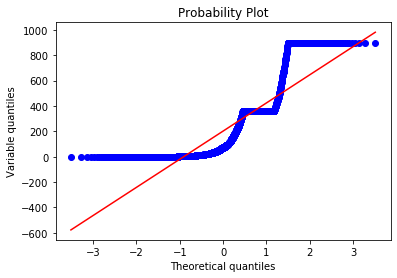

In [124]:
stats.probplot(trainset_new['evictions'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

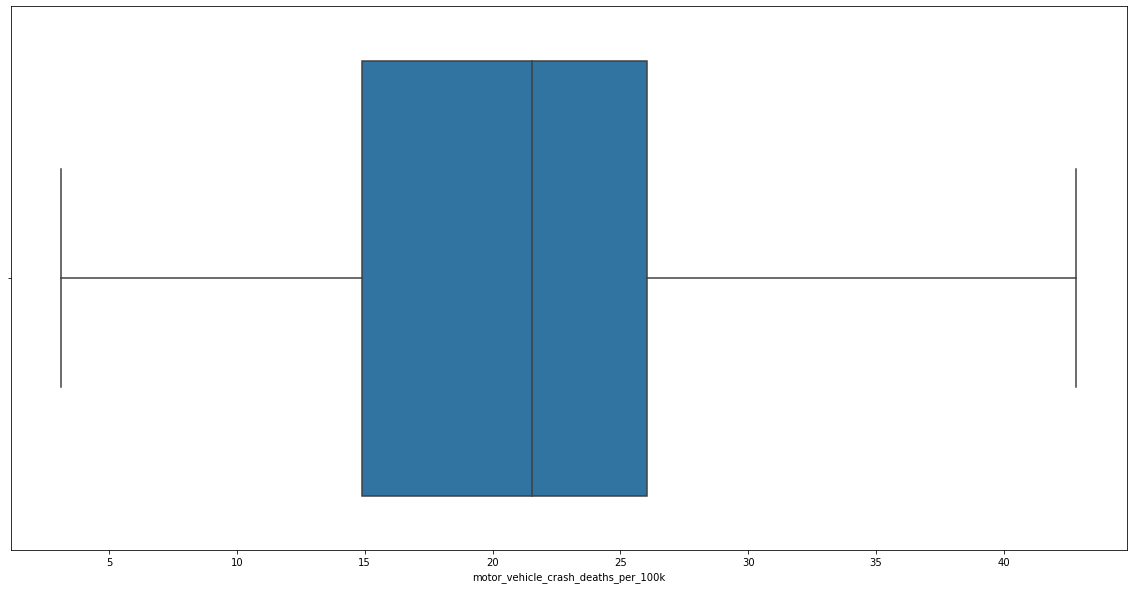

In [125]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.motor_vehicle_crash_deaths_per_100k)
plt.show()

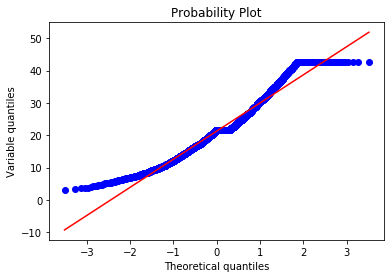

In [126]:
stats.probplot(trainset_new['motor_vehicle_crash_deaths_per_100k'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

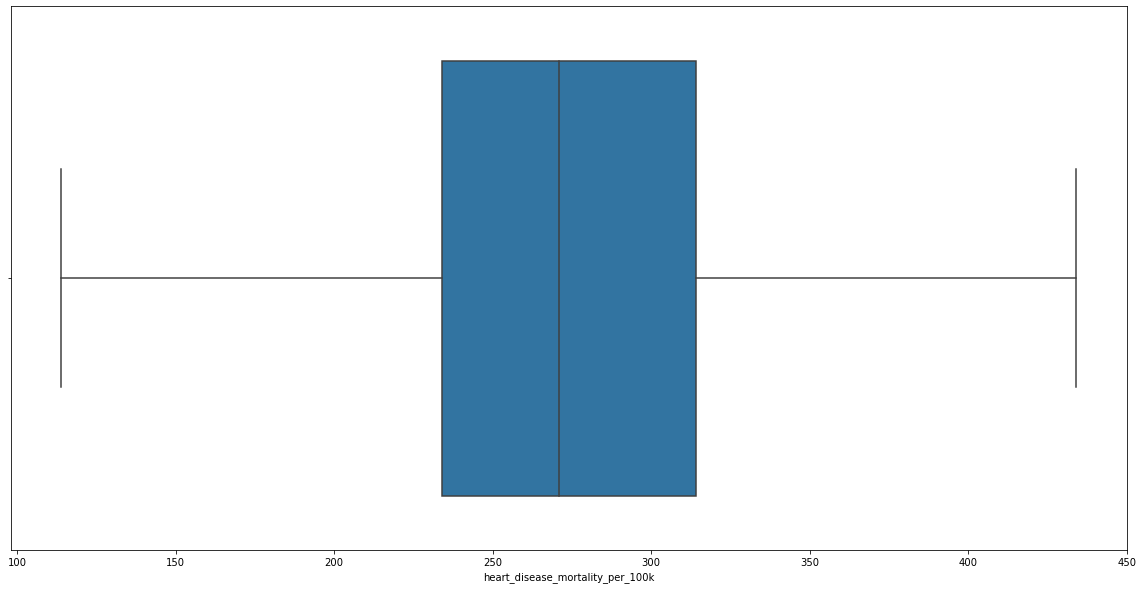

In [127]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.heart_disease_mortality_per_100k)
plt.show()

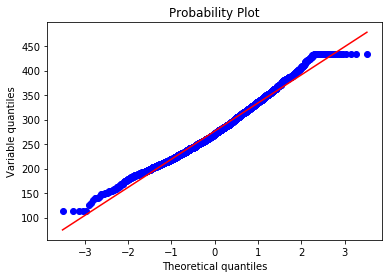

In [128]:
stats.probplot(trainset_new['heart_disease_mortality_per_100k'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

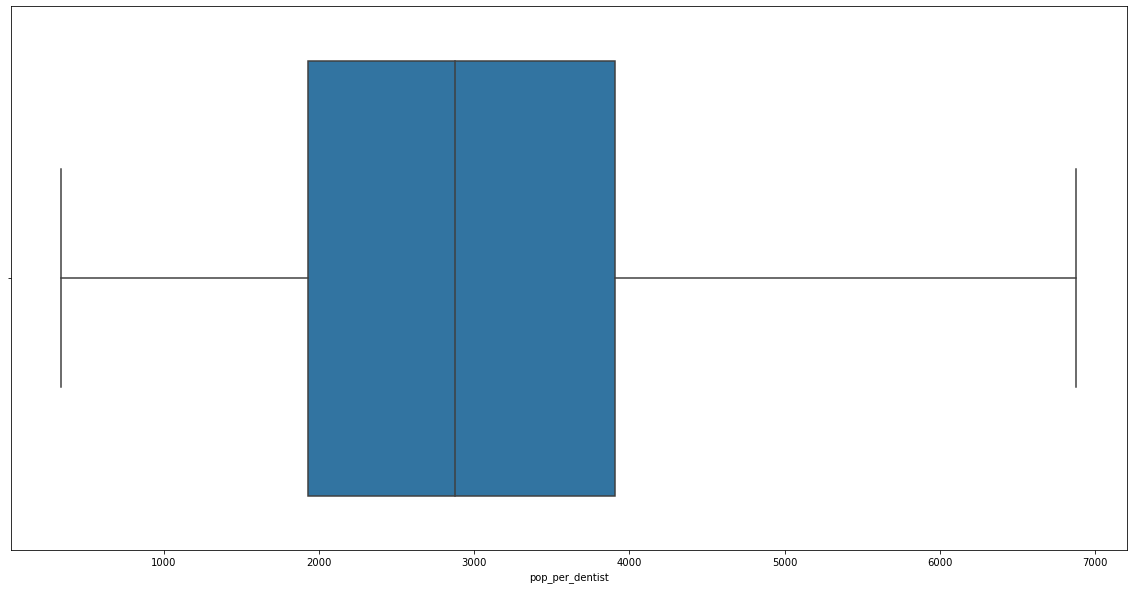

In [129]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.pop_per_dentist)
plt.show()

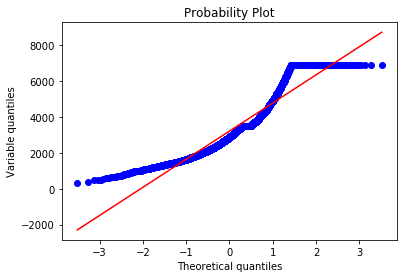

In [130]:
stats.probplot(trainset_new['pop_per_dentist'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

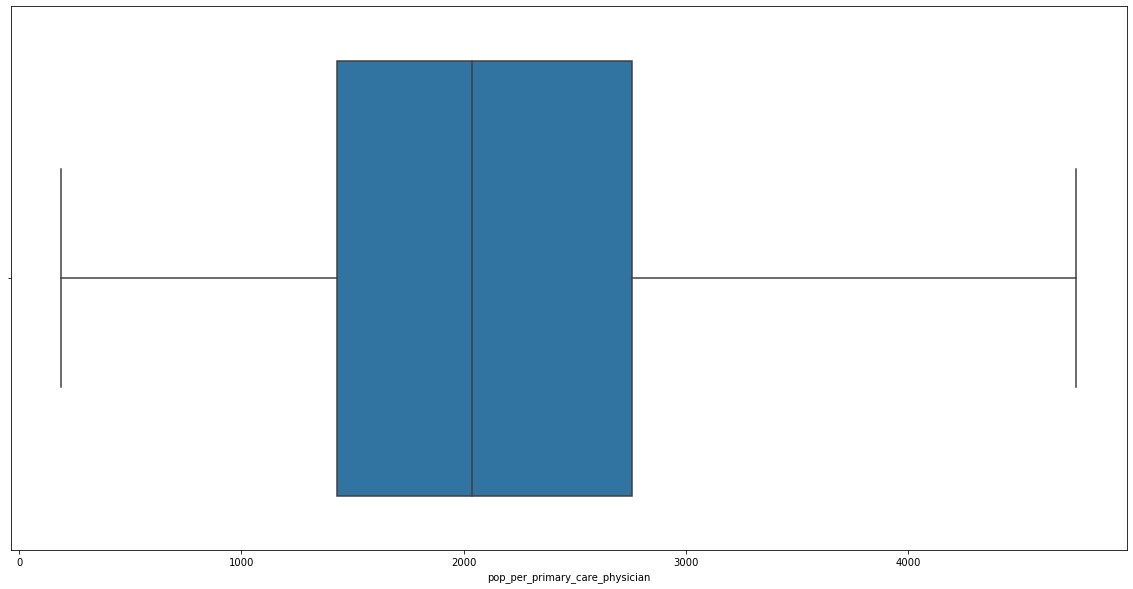

In [131]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.pop_per_primary_care_physician)
plt.show()

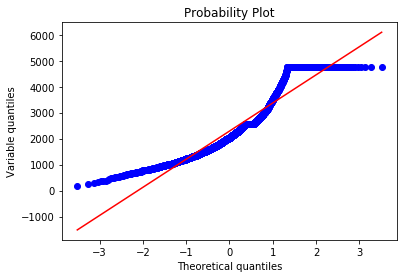

In [132]:
stats.probplot(trainset_new['pop_per_primary_care_physician'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

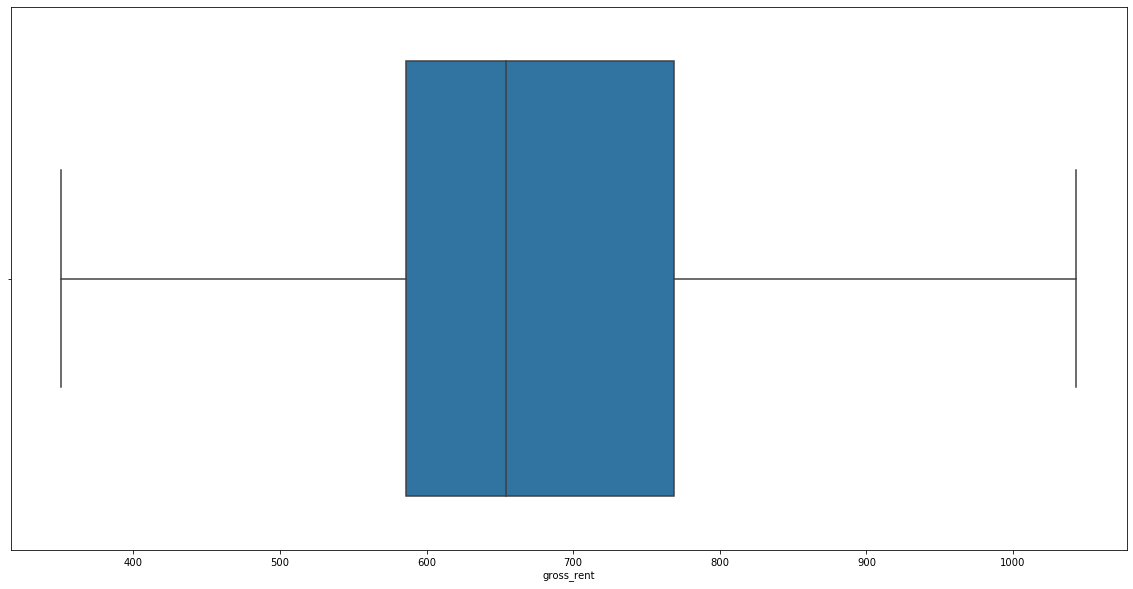

In [133]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.gross_rent)
plt.show()

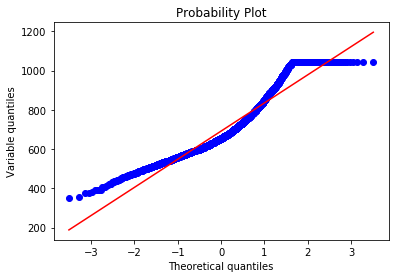

In [134]:
stats.probplot(trainset_new['gross_rent'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [135]:
windsoriser.left_tail_caps_

{'population': -73897.25,
 'renter_occupied_households': -8982.25,
 'pct_renter_occupied': 9.083875000000006,
 'evictions': -525.0878702962369,
 'rent_burden': 18.072375,
 'pct_white': 0.24259324062500004,
 'pct_af_am': -0.138557381,
 'pct_hispanic': -0.088652640875,
 'pct_am_ind': -0.006174517,
 'pct_asian': -0.012025241875000002,
 'pct_nh_pi': -0.000748099875,
 'pct_multiple': -0.007423020875,
 'pct_other': -0.001676711625,
 'poverty_rate': -2.4993750000000006,
 'pct_civilian_labor': 0.2885,
 'pct_unemployment': 0.0025000000000000022,
 'pct_uninsured_adults': 0.030999999999999944,
 'pct_uninsured_children': -0.014875,
 'pct_adult_obesity': 0.21237499999999995,
 'pct_adult_smoking': 0.07850000000000001,
 'pct_diabetes': 0.047,
 'pct_low_birthweight': 0.03850000000000002,
 'pct_excessive_drinking': 0.08700000000000005,
 'pct_physical_inactivity': 0.14187500000000003,
 'air_pollution_particulate_matter_value': 6.805128264999999,
 'homicides_per_100k': 5.773743999999998,
 'motor_vehicle_

In [136]:
windsoriser.right_tail_caps_

{'population': 152670.75,
 'renter_occupied_households': 18017.75,
 'pct_renter_occupied': 46.47887499999999,
 'evictions': 896.4797838270615,
 'rent_burden': 39.093375,
 'pct_white': 1.348244589625,
 'pct_af_am': 0.245877695,
 'pct_hispanic': 0.19766883412499997,
 'pct_am_ind': 0.013462445,
 'pct_asian': 0.026446157125,
 'pct_nh_pi': 0.001246833125,
 'pct_multiple': 0.038348746125,
 'pct_other': 0.0027945193750000003,
 'poverty_rate': 25.667625,
 'pct_civilian_labor': 0.6525000000000001,
 'pct_unemployment': 0.1185,
 'pct_uninsured_adults': 0.399,
 'pct_uninsured_children': 0.18012499999999998,
 'pct_adult_obesity': 0.40337500000000004,
 'pct_adult_smoking': 0.3385,
 'pct_diabetes': 0.16699999999999998,
 'pct_low_birthweight': 0.12249999999999998,
 'pct_excessive_drinking': 0.23899999999999996,
 'pct_physical_inactivity': 0.41687499999999994,
 'air_pollution_particulate_matter_value': 16.524637965000004,
 'homicides_per_100k': 5.773743999999998,
 'motor_vehicle_crash_deaths_per_100k':

In [137]:
trainset_new.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3.138000e+03,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,48594.989404,5635.185309,28.352035,202.180860,28.508608,0.775189,0.067219,0.064820,0.004461,0.008526,0.000311,0.016363,0.000712,12.063339,0.470684,0.062047,0.217178,0.086234,0.306036,0.211240,0.107055,0.082738,0.163773,0.278541,11.626925,5.773744e+00,21.281155,276.565966,3209.132891,2290.829034,0.502370,0.228150,0.166919,0.145049,0.347727,0.302668,0.200627,11.616462,10.391104,691.874920
std,50775.943502,6098.364390,7.360898,254.551216,4.327197,0.192870,0.086407,0.062854,0.004496,0.008372,0.000447,0.009388,0.000901,5.279560,0.067698,0.021198,0.065005,0.037310,0.039831,0.054107,0.022231,0.018134,0.037472,0.052406,1.522444,9.860352e-14,8.855640,57.764658,1643.901093,1134.984054,0.013689,0.030619,0.041162,0.064217,0.070022,0.051386,0.079345,2.395349,2.725338,148.598933
min,117.000000,15.000000,9.083875,-1.000000,18.072375,0.242593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288500,0.012000,0.039000,0.013000,0.212375,0.078500,0.047000,0.038500,0.087000,0.141875,6.965724,5.773744e+00,3.140000,114.000000,340.000000,190.000000,0.473500,0.153500,0.063500,0.015984,0.162897,0.160325,0.018924,5.601441,3.048179,351.000000
25%,11065.750000,1142.750000,23.107000,8.000000,25.955250,0.657212,0.005606,0.018718,0.001189,0.002402,0.000000,0.009741,0.000000,8.063250,0.425000,0.046000,0.169000,0.058250,0.284000,0.176000,0.092000,0.070000,0.144000,0.245000,10.449944,5.773744e+00,14.885000,234.000000,1930.000000,1429.000000,0.496000,0.209000,0.140000,0.095522,0.303326,0.266733,0.141752,10.063759,8.561913,586.000000
50%,25879.500000,2812.000000,27.289500,73.000000,28.745000,0.846237,0.020915,0.037449,0.002596,0.005386,0.000000,0.014736,0.000301,11.335000,0.472000,0.060000,0.215000,0.078000,0.307000,0.212639,0.106000,0.080000,0.164986,0.281000,11.858134,5.773744e+00,21.546496,271.000000,2879.000000,2039.000000,0.504000,0.228000,0.164000,0.130565,0.351500,0.302849,0.181546,11.510979,10.415358,654.000000
75%,67707.750000,7892.750000,32.455750,363.391914,31.210500,0.933625,0.101715,0.090298,0.006099,0.012019,0.000499,0.021184,0.001118,15.105000,0.516000,0.075000,0.261000,0.107000,0.331750,0.241000,0.122000,0.091000,0.182000,0.313750,12.879822,5.773744e+00,26.057500,314.000000,3909.000000,2759.000000,0.511000,0.246000,0.191000,0.187438,0.396945,0.337672,0.242182,13.038637,12.237736,768.750000
max,152670.750000,18017.750000,46.478875,896.479784,39.093375,0.997596,0.245878,0.197669,0.013462,0.026446,0.001247,0.038349,0.002795,25.667625,0.652500,0.118500,0.399000,0.180125,0.403375,0.338500,0.167000,0.122500,0.239000,0.416875,15.037129,5.773744e+00,42.816250,434.000000,6877.500000,4754.000000,0.533500,0.301500,0.267500,0.325311,0.537374,0.444080,0.392826,17.5009

In [138]:
#trainset_new.to_csv('combinedoutiliers.csv',index=False)

In [139]:
trainset_new.shape

(3138, 40)